<center>
<h1><b>Perfumedia</b></h1>
</center>
















# **Abstract**
In the enchanting world of fragrance, each scent tells a unique story, revealing facets of your personality and the impression you wish to leave on others. Every person has a different taste and will like distinct scents. By understanding your distinct taste, Perfumedia helps you to find and recommend the flawless perfume that perfectly matches your unique choice.

# **Problem Statement**
Build a recommendation system that helps users to find perfumes that correspond to their preferences.

### Details of the Data
Initially, I searched a lot for a dataset but could not find any that matched the features I wanted. So, the best option I found was to web-scrape a fragrance website and get the data. The website I chose for this is https://en.parfumdreams.de/Fragrances.

The data I scraped from this website include:
* Brand of the perfume
* Perfume name
* Category (EDT, EDP, Perfume, etc.)
* Gender
* Base price (price in Euro per 1000ml)
* Notes of the perfumes
* Fragrance of the perfume
* Character of the perfume
* Customer ratings
* Review counts
* URL of the perfume
* Image of the perfume


### Design Flow

These are the things I would like to perform to achieve results:


*   Web scraping
*   Data preprocessing
*   EDA (Exploratory Data Analysis)
* 	Data visualization (in Python, SQL & Tableau)
* 	Data processing - feature selection & extraction
* 	Data modeling & model evaluation
* 	Perfume APPs
*   Data modification for SQL
*   Summary


### Import Liabraries

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
# , Image, Markdown
# import ipywidgets as widgets
from wordcloud import WordCloud

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings

warnings.filterwarnings('ignore')

# **Web Scraping with BeautifulSoup**

In [ ]:
# url = 'https://en.parfumdreams.de/Fragrances'

In [ ]:
# Selector 
# Men page 1-27
# url = https://en.parfumdreams.de/Fragrances/Mens-fragrances/Mens-perfumes?att_ziel=1&p={}

# Unisex page 1-37
# url = https://en.parfumdreams.de/Fragrances/Womens-fragrances/Womens-perfumes?att_ziel=1&p={}

# Women --> Women page 1-37
# url = https://en.parfumdreams.de/Fragrances/Womens-fragrances/Womens-perfumes?att_ziel=1&p={}

# url
#CategoryBoxItem > div.cw.clearfix > div:nth-child(2) > div.product-image.c.d-12 > a
#CategoryBoxItem > div.cw.clearfix > div:nth-child(96) > div.product-image.c.d-12 > a

# brand
#CategoryBoxItem > div.cw.clearfix > div:nth-child(2) > div:nth-child(3) > div.sale > a > p > span:nth-child(1)
#CategoryBoxItem > div.cw.clearfix > div:nth-child(2) > div:nth-child(3) > div:nth-child(2) > a > p > span:nth-child(1)

# name
#CategoryBoxItem > div.cw.clearfix > div:nth-child(2) > div:nth-child(3) > div.sale > a > p > span:nth-child(2)
#CategoryBoxItem > div.cw.clearfix > div:nth-child(2) > div:nth-child(3) > div:nth-child(2) > a > p > span:nth-child(2)

# category
#CategoryBoxItem > div.cw.clearfix > div:nth-child(2) > div:nth-child(3) > div.sale > a > p > span:nth-child(4)
#CategoryBoxItem > div.cw.clearfix > div:nth-child(2) > div:nth-child(3) > div:nth-child(2) > a > p > span:nth-child(4)

# base price
#CategoryBoxItem > div.cw.clearfix > div:nth-child(2) > div:nth-child(3) > div.sale > div.item-base-price.font-description.premium-subscription-inactive
#CategoryBoxItem > div.cw.clearfix > div:nth-child(2) > div:nth-child(3) > div:nth-child(2) > div.item-base-price.font-description.premium-subscription-inactive

# image
#CategoryBoxItem > div.cw.clearfix > div:nth-child(2) > div.product-image.c.d-12 > a > img
#CategoryBoxItem > div.cw.clearfix > div:nth-child(96) > div.product-image.c.d-12 > a > img

In [ ]:
# # Define an empty list to store the extracted information
# data = []

# # Define the base URLs for different gender categories
# urls = {
#     'Men': 'https://en.parfumdreams.de/Fragrances/Mens-fragrances/Mens-perfumes?att_ziel=1&p={}',
#     'Women': 'https://en.parfumdreams.de/Fragrances/Womens-fragrances/Womens-perfumes?att_ziel=2&p={}',
#     'Unisex': 'https://en.parfumdreams.de/Fragrances/Womens-fragrances/Womens-perfumes?att_ziel=0&p={}'
# }

# # Define the CSS selector for product information
# base_selector = '#CategoryBoxItem > div.cw.clearfix > div:nth-child({}) > div.product-image.c.d-12 > a'

# # Define the CSS selectors for brand, name, category, base price, and image
# selector_brand = '#CategoryBoxItem > div.cw.clearfix > div:nth-child({}) > div:nth-child(3) > div.sale > a > p > span:nth-child(1)'
# selector_brand_alternative = '#CategoryBoxItem > div.cw.clearfix > div:nth-child({}) > div:nth-child(3) > div:nth-child(2) > a > p > span:nth-child(1)'

# selector_name_1 = '#CategoryBoxItem > div.cw.clearfix > div:nth-child({}) > div:nth-child(3) > div.sale > a > p > span:nth-child(2)'
# selector_name_2 = '#CategoryBoxItem > div.cw.clearfix > div:nth-child({}) > div:nth-child(3) > div.sale > a > p > span:nth-child(3)'
# selector_name_alternative_1 = '#CategoryBoxItem > div.cw.clearfix > div:nth-child({}) > div:nth-child(3) > div:nth-child(2) > a > p > span:nth-child(2)'
# selector_name_alternative_2 = '#CategoryBoxItem > div.cw.clearfix > div:nth-child({}) > div:nth-child(3) > div:nth-child(2) > a > p > span:nth-child(3)'

# selector_category = '#CategoryBoxItem > div.cw.clearfix > div:nth-child({}) > div:nth-child(3) > div.sale > a > p > span:nth-child(4)'
# selector_category_alternative = '#CategoryBoxItem > div.cw.clearfix > div:nth-child({}) > div:nth-child(3) > div:nth-child(2) > a > p > span:nth-child(4)'

# selector_base_price = '#CategoryBoxItem > div.cw.clearfix > div:nth-child({}) > div:nth-child(3) > div.sale > div.item-base-price.font-description.premium-subscription-inactive'
# selector_base_price_alternative = '#CategoryBoxItem > div.cw.clearfix > div:nth-child({}) > div:nth-child(3) > div:nth-child(2) > div.item-base-price.font-description.premium-subscription-inactive'

# selector_image = '#CategoryBoxItem > div.cw.clearfix > div:nth-child({}) > div.product-image.c.d-12 > a > img'

# # Iterate over different gender categories and corresponding URLs
# for gender, url_pattern in urls.items():
#     # Determine the maximum page number based on the gender category
#     max_pages = 0
#     if gender == 'Men':
#         max_pages = 27
#     elif gender == 'Women':
#         max_pages = 45
#     elif gender == 'Unisex':
#         max_pages = 37

#     for page in range(1, max_pages + 1):
#         # Construct the URL by substituting the page number into the base URL pattern
#         url = url_pattern.format(page)

#         # Send a GET request to the URL
#         r = requests.get(url)

#         # Parsing the HTML code
#         soup = BeautifulSoup(r.content, 'html.parser')

#         # Iterate over the range of child indices
#         for index in range(2, 97):
#             # Construct the CSS selectors by substituting the index into the base selectors
#             selector_product = base_selector.format(index)
#             selector_brand_product = selector_brand.format(index)
#             selector_name_product_1 = selector_name_1.format(index)
#             selector_name_product_2 = selector_name_2.format(index)
#             selector_category_product = selector_category.format(index)
#             selector_base_price_product = selector_base_price.format(index)
#             selector_image_product = selector_image.format(index)

#             # Find the element matching the selector for product information
#             element_product = soup.select_one(selector_product)

#             # Check if the element exists
#             if element_product:
#                 # Extract the href attribute (product URL)
#                 href = element_product['href']

#                 # Find the elements matching the selectors for brand, name, category, base price, and image
#                 brand_element = soup.select_one(selector_brand_product)
#                 name_element_1 = soup.select_one(selector_name_product_1)
#                 name_element_2 = soup.select_one(selector_name_product_2)
#                 category_element = soup.select_one(selector_category_product)
#                 base_price_element = soup.select_one(selector_base_price_product)
#                 image_element = soup.select_one(selector_image_product)

#                 # Check if the elements exist before extracting their text
#                 brand = brand_element.text.strip() if brand_element else soup.select_one(selector_brand_alternative.format(index)).text.strip()
#                 name_1 = name_element_1.text.strip() if name_element_1 else soup.select_one(selector_name_alternative_1.format(index)).text.strip()
#                 name_2 = name_element_2.text.strip() if name_element_2 else (soup.select_one(selector_name_alternative_2.format(index)).text.strip() if soup.select_one(selector_name_alternative_2.format(index)) else None)
#                 category = category_element.text.strip() if category_element else soup.select_one(selector_category_alternative.format(index)).text.strip()
#                 base_price = base_price_element.text.strip() if base_price_element else (soup.select_one(selector_base_price_alternative.format(index)).text.strip() if soup.select_one(selector_base_price_alternative.format(index)) else None)
#                 image = image_element['src'] if image_element else None

#                 # Append the extracted information to the list along with the gender information
#                 data.append({'brand': brand, 'name_1': name_1, 'name_2': name_2, 'category': category, 'gender': gender, 'base_price': base_price, 'url': href, 'image': image})

# # Create a DataFrame from the extracted data
# df = pd.DataFrame(data, columns=['brand', 'name_1', 'name_2', 'category', 'gender', 'base_price', 'url', 'image'])

# # Save the DataFrame to a CSV file
# df.to_csv('data/perfume_basic.csv', index=False)

In [ ]:
# df = pd.read_csv('data/perfume_basic.csv')
# df.head()

In [ ]:
# Selectors for more information

# Top note
#ProductDetailDescription > div > div.left-content > div.kopfnote.smell-items > p.subline

# Heart note
#ProductDetailDescription > div > div.left-content > div.herznote.smell-items > p.subline

# Base note
#ProductDetailDescription > div > div.left-content > div.basisnote.smell-items > p.subline

# Fragrance
#ProductDetailDescription > div > div.right-content > div.duftrichtung > p:nth-child(2)

# Charactor
#ProductDetailDescription > div > div.right-content > div.charakter > p:nth-child(2)

# Customer rating
#ratingsContent > div > div.p-l-0.left > div > div > span:nth-child(2)

# Review count
#ratingsContent > div > div.p-l-0.left > div > div > span:nth-child(3)

In [ ]:
# # Load the URLs from the CSV file
# urls = df['url']

# # Iterate over the URLs
# for index, url in urls.items():
#     # Send a GET request to the URL
#     response = requests.get('https://en.parfumdreams.de' + url)
#     response.raise_for_status()

#     # Parse the HTML content
#     soup = BeautifulSoup(response.content, 'html.parser')

#     # Extract information using the selectors
#     top_note_elements = soup.select('#ProductDetailDescription > div > div.left-content > div.kopfnote.smell-items > p.subline')
#     top_note = ' '.join([element.text.strip().replace('\r\n\r\n', ', ').replace('\r\n', ', ') for element in top_note_elements]) if top_note_elements else None

#     heart_note_elements = soup.select('#ProductDetailDescription > div > div.left-content > div.herznote.smell-items > p.subline')
#     heart_note = ' '.join([element.text.strip().replace('\r\n\r\n', ', ').replace('\r\n', ', ') for element in heart_note_elements]) if heart_note_elements else None

#     base_note_elements = soup.select('#ProductDetailDescription > div > div.left-content > div.basisnote.smell-items > p.subline')
#     base_note = ' '.join([element.text.strip().replace('\r\n\r\n', ', ').replace('\r\n', ', ') for element in base_note_elements]) if base_note_elements else None

#     fragrance_element = soup.select_one('#ProductDetailDescription > div > div.right-content > div.duftrichtung > p:nth-child(2)')
#     fragrance = fragrance_element.text.strip() if fragrance_element else None

#     character_element = soup.select_one('#ProductDetailDescription > div > div.right-content > div.charakter > p:nth-child(2)')
#     character = character_element.text.strip() if character_element else None

#     customer_rating_element = soup.select_one('#ratingsContent > div > div.p-l-0.left > div > div > span:nth-child(2)')
#     customer_rating = customer_rating_element.text.strip() if customer_rating_element else None

#     review_count_element = soup.select_one('#ratingsContent > div > div.p-l-0.left > div > div > span:nth-child(3)')
#     review_count = review_count_element.text.strip() if review_count_element else None

#     # Assign the extracted information to the corresponding URL index in the DataFrame
#     df.loc[index, ['top_note', 'heart_note', 'base_note', 'fragrance', 'character', 'customer_rating', 'review_count']] = top_note, heart_note, base_note, fragrance, character, customer_rating, review_count

# # Specify the desired order of columns
# column_order = ['brand', 'name_1', 'name_2', 'category', 'gender', 'base_price', 'top_note', 'heart_note', 'base_note', 'fragrance', 'character', 'customer_rating', 'review_count', 'url', 'image']

# # Reindex the DataFrame with the new column order
# df = df.reindex(columns=column_order)

# # Save the DataFrame to a CSV file
# df.to_csv('data/perfume_data.csv', index=False)

# **Data Preprocessing**

##### Dataset
* Importing the CSV files which were web scraped.
* The table consists of perfume brand, name, category, gender, base price, top notes, heart notes, base notes, fragrance, character, customer ratings, review counts, url, and image source.

In [2]:
# Load data
df = pd.read_csv('data/perfume_data.csv')
df.head()

,brand,name_1,name_2,category,gender,base_price,top_note,heart_note,base_note,fragrance,character,customer_rating,review_count,url,image
0,Hugo Boss,BOSS Bottled,NaN,Eau de Toilette Spray,Men,BP: €739.00* / 1000 ml,"apple, bergamot, lemon","geranium, carnation, cinnamon","sandalwood, vetiver, cedar",NaN,"elegant, masculine, oriental","4,9",144.0,/Hugo-Boss/Boss-Black-Mens-fragrances/BOSS-Bot...,https://cdn.parfumdreams.de/Img/Art/13/Hugo-Bo...
1,Yves Saint Laurent,Y,NaN,Eau de Parfum Spray,Men,BP: €915.83* / 1000 ml,"apple, bergamot, ginger","geranium, mint, sage, juniper berry","amber, tonka bean, incense",NaN,NaN,"4,9",137.0,/Yves-Saint-Laurent/Mens-fragrances/Y/Eau-de-P...,https://cdn.parfumdreams.de/Img/Art/13/Yves-Sa...
2,Abercrombie & Fitch,Away Weekend Men,NaN,Eau de Toilette Spray,Men,"BP: €1,398.33* / 1000 ml","bergamot, cardamom, mandarin","lavender, rosemary, sage","cocoa, patchouli, cedar wood",NaN,NaN,0,0.0,/Abercrombie-Fitch/Mens-fragrances/Away-Weeken...,https://cdn.parfumdreams.de/Img/Art/13/Abercro...
3,Jean Paul Gaultier,Le Mâle,NaN,Eau de Toilette Spray,Men,BP: €923.75* / 1000 ml,"bergamot, lavender, mint","spices, orange, cinnamon","amber, sandalwood, tonka bean",NaN,"masculine, sensual, oriental","4,9",275.0,/Jean-Paul-Gaultier/Mens-fragrances/Le-Male/Ea...,https://cdn.parfumdreams.de/Img/Art/13/Jean-Pa...
4,DIOR,Sauvage,Refillable - Citrus and Vanilla Notes,Eau de Parfum Spray,Men,"BP: €2,231.67* / 1000 ml","bergamot, lavender",pepper,"amber, patchouli, vetiver",wooden,"arromatic, vitalising, oriental","4,9",156.0,/DIOR/Mens-fragrances/Sauvage/Eau-de-Parfum-Sp...,https://cdn.parfumdreams.de/Img/Art/13/DIOR-Sa...


* There are 3230 perfumes in the dataset.

In [3]:
df.shape

(3230, 15)

* Understanding the data

In [4]:
df.describe(include='all')

,brand,name_1,name_2,category,gender,base_price,top_note,heart_note,base_note,fragrance,character,customer_rating,review_count,url,image
count,3230,3230,1320,3230,3230,3217,2118,2108,2116,665,395,3229,3229.000000,3230,3229
unique,292,1614,1177,166,3,862,1547,1581,1253,18,146,24,NaN,3230,3229
top,Montale,Oud,Intense,Eau de Parfum Spray,Women,"BP: €1,250.00* / 1000 ml",bergamot,jasmine,musk,floral,oriental,0,NaN,/Hugo-Boss/Boss-Black-Mens-fragrances/BOSS-Bot...,https://cdn.parfumdreams.de/Img/Art/13/Hugo-Bo...
freq,105,40,13,1742,1338,42,48,45,50,258,52,1459,NaN,1,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262620,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.789371,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3230 entries, 0 to 3229
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            3230 non-null   object 
 1   name_1           3230 non-null   object 
 2   name_2           1320 non-null   object 
 3   category         3230 non-null   object 
 4   gender           3230 non-null   object 
 5   base_price       3217 non-null   object 
 6   top_note         2118 non-null   object 
 7   heart_note       2108 non-null   object 
 8   base_note        2116 non-null   object 
 9   fragrance        665 non-null    object 
 10  character        395 non-null    object 
 11  customer_rating  3229 non-null   object 
 12  review_count     3229 non-null   float64
 13  url              3230 non-null   object 
 14  image            3229 non-null   object 
dtypes: float64(1), object(14)
memory usage: 378.6+ KB


* Cleaning the data

In [6]:
# Checking for duplicates.
duplicates = df[df.duplicated(keep=False)]

# We add a new column 'is_duplicate' to the duplicates dataframe
df['is_duplicate'] = True

if duplicates.empty:
    print("No duplicates found")
else:
    print("Duplicates found:\n", duplicates)

No duplicates found


In [7]:
# Create a new 'perfume_id' column and extract perfume id from the 'url' column and 
df['perfume_id'] = df['url'].str.split('/').str[-1].str.split('_').str[-1].str.extract(r'(\d+)')

# Move the 'perfume_id' column to the first position in the DataFrame
first_column = df.pop('perfume_id')
df.insert(0, 'perfume_id', first_column)
df.perfume_id.nunique()

3230

In [8]:
# Check rows which have no notes information included
df_notes_null = df[df['top_note'].isnull() & df['heart_note'].isnull() & df['base_note'].isnull()]
df_notes_null.head()

,perfume_id,brand,name_1,name_2,category,gender,base_price,top_note,heart_note,base_note,fragrance,character,customer_rating,review_count,url,image,is_duplicate
5,123442,Hej:Pure,Pure Wood,NaN,Eau de Parfum Spray,Men,BP: €699.00* / 1000 ml,NaN,NaN,NaN,NaN,NaN,0,0.0,/HejPure/Mens-fragrances/Pure-Wood/Eau-de-Parf...,https://cdn.parfumdreams.de/Img/Art/13/HejPure...,True
7,122866,Jean Paul Gaultier,Le Mâle,NaN,Parfum Spray,Men,"BP: €1,066.00* / 1000 ml",NaN,NaN,NaN,NaN,NaN,5,57.0,/Jean-Paul-Gaultier/Mens-fragrances/Le-Male/Pa...,https://cdn.parfumdreams.de/Img/Art/13/Jean-Pa...,True
18,80495,Versace,Eros Flame,NaN,Eau de Parfum Spray,Men,"BP: €1,231.67* / 1000 ml",NaN,NaN,NaN,NaN,NaN,"4,8",23.0,/Versace/Mens-fragrances/Eros-Flame/Eau-de-Par...,https://cdn.parfumdreams.de/Img/Art/13/Versace...,True
36,101879,Azzaro,Wanted,The Most Wanted,Eau de Parfum Spray Intense,Men,"BP: €1,199.00* / 1000 ml",NaN,NaN,NaN,NaN,NaN,"4,9",70.0,/Azzaro/Mens-fragrances/Wanted/Eau-de-Parfum-S...,https://cdn.parfumdreams.de/Img/Art/13/Azzaro-...,True
37,92046,Valentino,Uomo Intense,NaN,Eau de Parfum Spray,Men,"BP: €1,159.00* / 1000 ml",NaN,NaN,NaN,NaN,NaN,"4,9",17.0,/Valentino/Mens-fragrances/Uomo-Intense/Eau-de...,https://cdn.parfumdreams.de/Img/Art/13/Valenti...,True


In [9]:
# Select the rows in the df where the 'top_note', 'heart_note', or 'base_note' column is not null
df = df[df['top_note'].notnull() | df['heart_note'].notnull() | df['base_note'].notnull()]

In [10]:
# Check 'brand' column
df['brand'].value_counts().sort_index(ascending=True)

brand
4711                     8
4711 Acqua Colonia      11
ASABI                    4
Abercrombie & Fitch     15
Absolument Parfumeur     2
                        ..
Yves Saint Laurent      19
Zadig & Voltaire         7
Zarkoperfume            11
adidas                   2
s.Oliver                23
Name: count, Length: 238, dtype: int64

In [11]:
# Clean brand: 4711
for index, row in df.iterrows():
    if row['brand'] == '4711 Acqua Colonia':
        # Update 'brand' to '4711'
        df.at[index, 'brand'] = '4711'

        # Add 'Acqua Colonia' to the beginning of 'name_1'
        df.at[index, 'name_1'] = 'Acqua Colonia ' + row['name_1']

In [12]:
# Clean brand: XERJOFF
for index, row in df.iterrows():
    if row['brand'] == 'XERJOFF Casamorati':
        # Update 'brand' to 'XERJOFF'
        df.at[index, 'brand'] = 'XERJOFF'

        # Add 'Acqua Colonia' to the beginning of 'name_1'
        df.at[index, 'name_1'] = 'Casamorati ' + row['name_1']

In [13]:
# Check name columns
# df.name_1.value_counts()
df.name_2.value_counts()

name_2
Intense                10
Black                   5
Rose                    5
Eau de Parfum Spray     4
Noir                    3
                       ..
Vanilla Touch           1
Back To Paris Femme     1
Touch Of Woman          1
Mon Éclat               1
Sandflowers             1
Name: count, Length: 915, dtype: int64

In [14]:
df[df.name_2 == "Eau de Parfum Spray"]

,perfume_id,brand,name_1,name_2,category,gender,base_price,top_note,heart_note,base_note,fragrance,character,customer_rating,review_count,url,image,is_duplicate
310,84721,Eisenberg,Les Orientaux Latins,Eau de Parfum Spray,Secret N°VI Cuir d'Orient Homme,Men,"BP: €3,731.67* / 1000 ml","blackcurrant, pepper, saffron","jasmine, leather, rose, violet, cedar","leather, rosewood, sandalwood, inc...",leathery,NaN,0,0.0,/Eisenberg/Mens-fragrances/Les-Orientaux-Latin...,https://cdn.parfumdreams.de/Img/Art/13/Eisenbe...,True
335,84718,Eisenberg,Les Orientaux Latins,Eau de Parfum Spray,Secret N°III Patchouli Nobile Homme,Men,"BP: €3,731.67* / 1000 ml","bergamot, cardamom, carnation, pepper, cinnamo...","iris, lavender, patchouli, vetiver","iris, ladan resin, musk, rosewood, tonka bean,...",oriental,NaN,5,1.0,/Eisenberg/Mens-fragrances/Les-Orientaux-Latin...,https://cdn.parfumdreams.de/Img/Art/13/Eisenbe...,True
521,84720,Eisenberg,Les Orientaux Latins,Eau de Parfum Spray,Secret N°V Ambre d'Orient Homme,Men,"BP: €3,731.67* / 1000 ml","bergamot, jasmine, pepper, rose, c...","nagarmotha, patchouli, vetiver, cedar","musk, tonka bean, vanilla, incense, myrrh, amb...",oriental,NaN,0,0.0,/Eisenberg/Mens-fragrances/Les-Orientaux-Latin...,https://cdn.parfumdreams.de/Img/Art/13/Eisenbe...,True
544,84719,Eisenberg,Les Orientaux Latins,Eau de Parfum Spray,Secret N°IV Rituel d'Orient Homme,Men,"BP: €3,731.67* / 1000 ml",lemon,flowers,"amber, musk, patchouli, vanilla, g...",NaN,NaN,0,0.0,/Eisenberg/Mens-fragrances/Les-Orientaux-Latin...,https://cdn.parfumdreams.de/Img/Art/13/Eisenbe...,True


In [15]:
# Create a boolean mask to filter rows where name_2 column is "Eau de Parfum Spray"
mask = df['name_2'] == "Eau de Parfum Spray"

# Store the values from 'name_2' column in a temporary variable
temp_values = df.loc[mask, 'name_2'].copy()

# Update the 'name_2' column with the values from the 'category' column
df.loc[mask, 'name_2'] = df.loc[mask, 'category']

# Update the 'category' column with the values from the temporary variable
df.loc[mask, 'category'] = temp_values

In [16]:
#df[df.name_2 == "Refillable - Citrus and Vanilla Notes"]
df[df.name_2 == "Citrus and Woody Notes - Refillable Bottle"]

,perfume_id,brand,name_1,name_2,category,gender,base_price,top_note,heart_note,base_note,fragrance,character,customer_rating,review_count,url,image,is_duplicate
40,87043,DIOR,Sauvage,Citrus and Woody Notes - Refillable Bottle,Parfum Men's Fragrance,Men,"BP: €2,565.00* / 1000 ml","bergamot, lavender, pepper","geranium, pepper","patchouli, vetiver",arromatic,NaN,"4,6",21.0,/DIOR/Mens-fragrances/Sauvage/Parfum-Mens-Frag...,https://cdn.parfumdreams.de/Img/Art/13/DIOR-Sa...,True


In [17]:
# More cleaning in 'name_2' column
df.name_2 = df.name_2.replace("Refillable - Citrus and Vanilla Notes", "Citrus and Vanilla Notes")
df.name_2 = df.name_2.replace("Citrus and Woody Notes - Refillable Bottle", "Citrus and Woody Notes")

In [18]:
df.loc[40, 'name_2']

'Citrus and Woody Notes'

In [19]:
# Create a new column 'name' to combine 'name_1' and 'name_2' columns
df['name'] = df.apply(lambda row: f"{row['name_1']} {row['name_2']}" if pd.notnull(row['name_1']) and pd.notnull(row['name_2']) else row['name_1'], axis=1)

# Drop the 'name_1' and 'name_2' columns
df.drop(columns=['name_1', 'name_2'], inplace=True)

# Rearrange the order of columns
column_order = ['perfume_id', 'brand', 'name', 'category', 'gender', 'base_price', 'top_note', 'heart_note', 'base_note', 'fragrance', 'character', 'customer_rating', 'review_count', 'url', 'image']
df = df.reindex(columns=column_order)

In [20]:
# Check duplicates in the cells in the 'name' column
df[df['name'].apply(lambda text: len(text.split()) != len(set(text.split())))]

,perfume_id,brand,name,category,gender,base_price,top_note,heart_note,base_note,fragrance,character,customer_rating,review_count,url,image
53,52010,Jean Paul Gaultier,Le Mâle Ultra Mâle,Eau de Toilette Spray Intense,Men,BP: €551.60* / 1000 ml,"bergamot, pear, lavender",cinnamon,"amber, vanilla",NaN,NaN,"4,9",27.0,/Jean-Paul-Gaultier/Mens-fragrances/Le-Male/Ea...,https://cdn.parfumdreams.de/Img/Art/13/Jean-Pa...
58,109978,DIOR,Dior Homme Dior Homme Sport,Eau de Toilette Spray,Men,BP: €972.67* / 1000 ml,"bergamot, pepper, lemon",NaN,NaN,NaN,NaN,"4,5",8.0,/DIOR/Mens-fragrances/Dior-Homme/Eau-de-Toilet...,https://cdn.parfumdreams.de/Img/Art/13/DIOR-Di...
64,11095,Armani,Emporio Armani Emporio He,Eau de Toilette Spray,Men,"BP: €1,031.67* / 1000 ml","pineapple, apple, bergamot, cardamom, mandarin...","iris, jasmine, rose, violet, nutmeg","amber, moss, musk, sandalwood, tonka bean, ...",wooden,elegant,"4,4",41.0,/Armani/Emporio-Armani-Parfums/Emporio-Armani/...,https://cdn.parfumdreams.de/Img/Art/13/Armani-...
115,69345,Acqua di Parma,Colonia Colonia Pura,Eau de Cologne Spray,Men,"BP: €1,199.00* / 1000 ml",bergamot,"jasmine, daffodil","musk, patchouli, cedar",aquatic,NaN,5,1.0,/Acqua-di-Parma/Unisex-fragrances/Colonia/Eau-...,https://cdn.parfumdreams.de/Img/Art/13/Acqua-d...
160,13782,Acqua di Parma,Colonia Colonia Intensa,Eau de Cologne Spray,Men,"BP: €1,179.00* / 1000 ml","bergamot, ginger, cardamom, lemon","flowers, neroli, green notes","benzoin, wood, leather, musk, patchouli, ...",wooden,NaN,"4,9",8.0,/Acqua-di-Parma/Unisex-fragrances/Colonia/Eau-...,https://cdn.parfumdreams.de/Img/Art/13/Acqua-d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2892,115546,Histoires de Parfums,This Is Not A Blue Bottle Blue 1.4,Eau de Parfum Spray,Unisex,"BP: €2,866.67* / 1000 ml",davana,ylang-ylang,opoponax,NaN,sensual,0,0.0,/Histoires-de-Parfums/Collections/This-Is-Not-...,https://cdn.parfumdreams.de/Img/Art/13/Histoir...
2902,115547,Histoires de Parfums,This Is Not A Blue Bottle Blue 1.5,Eau de Parfum Spray,Unisex,"BP: €2,866.67* / 1000 ml",aldehyde,ozone,mineral notes,fresh,NaN,0,0.0,/Histoires-de-Parfums/Collections/This-Is-Not-...,https://cdn.parfumdreams.de/Img/Art/13/Histoir...
2932,112358,Maison Tahité,Cacao Collection Cacao Libertine,Eau de Parfum Spray,Unisex,BP: €979.50* / 1000 ml,"bergamot, mandarin","cardamom, rose, tuberose","benzoin, cocoa, caramel, patchouli, ...",NaN,NaN,0,0.0,/Maison-Tahite/Collections/Cacao-Collection/Ea...,https://cdn.parfumdreams.de/Img/Art/13/Maison-...
3014,96382,KAJAL,The Fiddah Collection Fiddah,Eau de Parfum Spray,Unisex,"BP: €1,949.50* / 1000 ml","aniseed, bergamot, cinnamon",tabacco,"amber, musk, tonka bean, vanilla, ...",NaN,NaN,0,0.0,/KAJAL/Collection/The-Fiddah-Collection/Eau-de...,https://cdn.parfumdreams.de/Img/Art/13/KAJAL-T...


In [21]:
# Define the brands for which to clean to duplicates
brands_to_update = ['DIOR', 'Acqua di Parma', '4711']

# Delete duplicated words in the 'name' column for the specified brands
df.loc[df['brand'].isin(brands_to_update), 'name'] = df.loc[df['brand'].isin(brands_to_update), 'name'].apply(lambda text: ' '.join(dict.fromkeys(text.split())))

In [22]:
# More duplicates cleaning in 'name' column
perfume_id_to_update = [64881, 35603, 122827, 99768, 102908]

# Apply the logic to the 'name' column for the specified rows
df.loc[df.perfume_id.isin(perfume_id_to_update), 'name'] = df.loc[df.perfume_id.isin(perfume_id_to_update), 'name'].apply(lambda text: ' '.join(dict.fromkeys(text.split())))

In [23]:
df.loc[651]

perfume_id                                                     64881
brand                                                          Gucci
name                       Gucci Guilty Pour Homme Absolute Absolute
category                                         Eau de Parfum Spray
gender                                                           Men
base_price                                  BP: €1,121.67* / 1000 ml
top_note                                   wood,             leather
heart_note                                                 patchouli
base_note                                                        NaN
fragrance                                                        NaN
character                                                        NaN
customer_rating                                                    5
review_count                                                     4.0
url                /Gucci/Mens-fragrances/Gucci-Guilty-Pour-Homme...
image              https://cdn.par

In [24]:
# Check "category" column
df.category.unique()

array(['Eau de Toilette Spray', 'Eau de Parfum Spray', 'Parfum Spray',
       'Eau de Parfum Spray Intense', 'Le Parfum Spray', 'Gift set',
       'Parfum- refillable', 'Parfum', "Parfum Men's Fragrance",
       'Eau de Parfum Spray- refillable', 'Eau de Toilette Spray Intense',
       'Eau de Toilette Spray Refillable', 'Le Parfum', 'Cologne Spray',
       'Eau de Cologne Spray', 'Eau de Toilette Spray- refillable',
       'Perfume', 'Parfum Intense', 'Parfume Spray',
       'Extrait de Parfum Spray', 'Eau de Parfum Spray Essentiel',
       'Gift Set', 'Eau de Toilette Spray Tuscany',
       'Eau de Parfum Spray Extreme', 'Eau de Cologne Spray Concentré',
       'Eau de Toilete Spray', 'Eau de Parfum Splash Bottle',
       'Perfume Spray', 'Extrait de Parfum',
       'Eau de Toilette Splash Bottle', 'Travellers Set Masculine',
       'Eau de Parfum Spray refillable', 'Eau de Parfum Spray Florale',
       'Eau de Parfum Spray Refillable', 'Eau De Toilette Spray',
       'Eau de Parfum 

In [25]:
# Create a new column 'category_mod'
df['category_mod'] = df['category'].str.lower()

# Map values to the new column based on keywords
df.loc[df['category_mod'].str.contains('eau de parfum'), 'category_mod'] = 'Eau de Parfum'
df.loc[df['category_mod'].str.contains('eau de toilette|toilet'), 'category_mod'] = 'Eau de Toilette'
df.loc[df['category_mod'].str.contains('cologne'), 'category_mod'] = 'Eau de Cologne'
df.loc[df['category_mod'].str.contains('parfum|perfume|extrait'), 'category_mod'] = 'Parfum'
df.loc[df['category_mod'].str.contains('fraiche|fraîche'), 'category_mod'] = 'Eau Fraiche'
df.loc[~df['category_mod'].isin(['Eau de Parfum', 'Eau de Toilette', 'Parfum', 'Eau de Cologne', 'Eau Fraiche']), 'category_mod'] = 'Other'

In [26]:
# df[df['category_mod'].isin(['Eau de Parfum'])][['name', 'category', 'category_mod', 'url']]
# df[df['category_mod'].isin(['Eau de Toilette'])][['name', 'category', 'category_mod', 'url']]
# df[df['category_mod'].isin(['Eau de Cologne'])][['name', 'category', 'category_mod', 'url']]
# df[df['category_mod'].isin(['Parfum'])][['name', 'category', 'category_mod', 'url']]
# df[df['category_mod'].isin(['Eau Fraiche'])][['name', 'category', 'category_mod', 'url']]
df[df['category_mod'].isin(['Other'])][['name', 'category', 'category_mod', 'url']]

,name,category,category_mod,url
29,Ambassador For Men,Gift set,Other,/Gisada/Mens-fragrances/Ambassador-For-Men/Gif...
167,He Wood,Gift set,Other,/Dsquared2/Mens-fragrances/He-Wood/Gift-set/in...
175,Phantom,Gift Set,Other,/Paco-Rabanne/Mens-fragrances/Phantom/Gift-Set...
243,KENZO HOMME,Gift Set,Other,/KENZO/Mens-fragrances/KENZO-HOMME/Gift-Set/in...
263,GENTLEMAN GIVENCHY Boisée,Gift Set,Other,/GIVENCHY/Mens-fragrances/GENTLEMAN-GIVENCHY/G...
289,Signature Man,Gift Set,Other,/Otto-Kern/Mens-fragrances/Signature-Man/Gift-...
298,KENZO HOMME,Gift Set,Other,/KENZO/Mens-fragrances/KENZO-HOMME/Gift-Set/in...
394,Reflect,Gift Set,Other,/BALR/Mens-fragrances/Reflect/Gift-Set/index_1...
400,2 Men,Gift Set,Other,/BALR/Mens-fragrances/2-Men/Gift-Set/index_117...
441,Man X,Gift set,Other,/Halloween/Mens-fragrances/Man-X/Gift-set/inde...


In [27]:
# df[df.category == "Eau de Parfum Spray Intense"]
# df[df.name == "Brioni"]
# df[df.name == "L'Homme Idéal"]
# df[df.name == "Himalaya"]
# df[df.name == "Viking"]
# df[df.name == "La vie est belle"]
# df[df.name == "My Way"]
# df[df.name == "Black Opium"]
# df[df.name == "La Panthère"]
# df[df.name == "Nomade"]
# df[df.name == "Annicke Collection"]
# df[df.name == "Cloud Collection"]
# df[df.category == "Parfum d’eau"]
# df[df.name == "Eau Sauvage"]
# df[df.name == "Les Créations de Monsieur Dior"]
# df[df.name == "Girl"]
# df[df.name == "Les Légendaires"]
# df[df.name == "Classic"]
# df[df.name == "Black Collection"]
# df[df.category == "Roller-Pearl"]
# df[df.category == "Roller-Pearl Rose N Roses"]
# df[df.category == "Eau du Coq Spray"]
# df[df.category == "Eau Imperiale Spray"]
# df[df.category == "Eau Cedrat Spray"]
# df[df.category == "Eau Guerlain Spray"]
df[df.name == "Original Eau de Cologne"]

,perfume_id,brand,name,category,gender,base_price,top_note,heart_note,base_note,fragrance,character,customer_rating,review_count,url,image,category_mod
1265,22706,4711,Original Eau de Cologne,Eau de Cologne Splash Bottle,Women,BP: €222.40* / 1000 ml,"basil, bergamot, peach, lemon","oakmoss, musk, patchouli, sandalwood, vetiver,...","oakmoss, musk, patchouli, sandalwood, vetiver,...",NaN,NaN,"4,6",5.0,/4711/Womens-fragrances/Original-Eau-de-Cologn...,https://cdn.parfumdreams.de/Img/Art/13/4711-Ec...,Eau de Cologne
1665,22708,4711,Original Eau de Cologne,Eau de Cologne Spray,Women,BP: €270.00* / 1000 ml,"basil, bergamot, peach, lemon","jasmine, lily, melon, rose, violet","oakmoss, musk, patchouli, sandalwood, vetiver,...",NaN,NaN,"4,5",2.0,/4711/Womens-fragrances/Original-Eau-de-Cologn...,https://cdn.parfumdreams.de/Img/Art/13/4711-Ec...,Eau de Cologne


In [28]:
# More cleaning in 'category' column

# Eau de Parfum 
df.loc[df['category'] == "Eau de Parfum Spray Intense", 'name'] = df.loc[df['category'] == "Eau de Parfum Spray Intense", 'name'].apply(lambda x: x + " Intense" if "Intense" not in x else x)
df.loc[153, 'name'] = "Brioni Essentiel"
df.loc[219, 'name'] = "L'Homme Idéal Extreme"
df.loc[600, 'name'] = "Himalaya Splash Bottle"
df.loc[648, 'name'] = "Viking Splash Bottle"
df.loc[858, 'name'] = "La vie est belle Intensément"
df.loc[1017, 'name'] = "My Way Intense"
df.loc[1100, 'name'] = "Black Opium Extreme"
df.loc[1229, 'name'] = "La Panthère Limited Edition"
df.loc[1256, 'name'] = "Nomade Absolu"
df.loc[1497, 'name'] = "Annicke Collection 6"
df.loc[1700, 'name'] = "Annicke Collection 5"
df.loc[1701, 'name'] = "Annicke Collection 4"
df.loc[1702, 'name'] = "Annicke Collection 3"
df.loc[1735, 'name'] = "Annicke Collection 1"
df.loc[1940, 'name'] = "Annicke Collection 2"
df.loc[2486, 'name'] = "Cloud Collection No.1"
df.loc[2711, 'name'] = "Cloud Collection No.3"
df.loc[3022, 'name'] = "Cloud Collection No.2"
df.loc[df['category'] == 'Parfum d’eau', 'category_mod'] = 'Eau de Parfum'

# Eau de Toilette
df.loc[737, 'name'] = "Eau Sauvage Splash Bottle"
df.loc[972, 'name'] = "Les Créations de Monsieur Dior Forever and Ever"
df.loc[1059, 'name'] = "Les Créations de Monsieur Dior Dioressence"
df.loc[1137, 'name'] = "Les Créations de Monsieur Dior Diorella"
df.loc[1989, 'name'] = "Girl Blooming Edition"
df.loc[2081, 'name'] = "Les Légendaires Bee Bottle"

# Eau de Cologne
df.loc[270, 'name'] = "Classic Concentré"
df.loc[1265, 'name'] = "Original Eau de Cologne Splash Bottle"

# Perfum
df.loc[3151, 'name'] = "Black Collection Fresh Oud"
df.loc[3152, 'name'] = "Black Collection Sweet Rose"

# Other
df.loc[df['category'] == 'Roller-Pearl', 'category_mod'] = 'Eau de Toilette'
df.loc[df['category'] == 'Roller-Pearl Rose N Roses', ['category_mod', 'name']] = ['Eau de Toilette', 'Miss Dior Rose N Roses']
df.loc[df['category'] == 'Eau du Coq Spray', 'category_mod'] = 'Eau de Cologne'
df.loc[df['category'] == 'Eau Imperiale Spray', 'category_mod'] = 'Eau de Cologne'
df.loc[df['category'] == 'Eau Cedrat Spray', 'category_mod'] = 'Eau Fraiche'
df.loc[df['category'] == 'Eau Guerlain Spray', 'category_mod'] = 'Eau de Cologne'
df = df[df['category_mod'] != 'Other']

In [29]:
# Drop the 'category' column
df.drop(columns=['category'], inplace=True)

# Change the column name 'category_mod' to 'category'
df.rename(columns={'category_mod': 'category'}, inplace=True)

# Rearrange the order of columns
column_order = ['perfume_id', 'brand', 'name', 'category', 'gender', 'base_price', 'top_note', 'heart_note', 'base_note', 'fragrance', 'character', 'customer_rating', 'review_count', 'url', 'image']
df = df.reindex(columns=column_order)

In [30]:
# Check "base_price" column
df.base_price.value_counts()

base_price
BP: €1,250.00* / 1000 ml    41
BP: €3,450.00* / 1000 ml    25
BP: €999.50* / 1000 ml      23
BP: €1,796.67* / 1000 ml    21
BP: €1,050.00* / 1000 ml    20
                            ..
BP: €1,779.00* / 1000 ml     1
BP: €2,298.33* / 1000 ml     1
BP: €621.67* / 1000 ml       1
BP: €930.00* / 1000 ml       1
BP: €3,277.22* / 1000 ml     1
Name: count, Length: 626, dtype: int64

In [31]:
# Clean "base_price" column
def extract_numeric_value(text):
    if isinstance(text, str):
        match = re.search(r"€([\d,\.]+)\*", text)
        if match:
            price_str = match.group(1).replace(",", "")  # Remove commas from the price string
            return float(price_str)
    return

df["base_price"] = df["base_price"].apply(extract_numeric_value)

In [32]:
# Check the range of the cleaned "base_price" column
min_price = df["base_price"].min()
max_price = df["base_price"].max()
min_price, max_price

(79.5, 16000.0)

In [33]:
# Check NaN values in "base_price" column
df[df.base_price.isna()]

,perfume_id,brand,name,category,gender,base_price,top_note,heart_note,base_note,fragrance,character,customer_rating,review_count,url,image
1578,19818,Alyssa Ashley,Musk,Parfum,Women,NaN,"jasmine, rose, violet","iris, moss, musk, wood",musk,NaN,NaN,"4,9",9.0,/Alyssa-Ashley/Unisex-fragrances/Musk/Perfume-...,https://cdn.parfumdreams.de/Img/Art/13/Alyssa-...


In [34]:
# Update the base price for this item
df.loc[1578, 'base_price'] = 2660.00

In [35]:
# Check notes column
print(df.top_note.unique())
print(df.heart_note.unique())
print(df.base_note.unique())

['apple, bergamot,             lemon'
 'apple, bergamot,             ginger'
 'bergamot, cardamom,             mandarin' ...
 'bergamot, ginger, musk, oud, vanilla, herbs,             cedar wood'
 'grapefruit,             fruity notes'
 'algae, salt,             aquatic notes']
['geranium, carnation,             cinnamon'
 'geranium, mint, sage,             juniper berry'
 'lavender, rosemary,             sage' ...
 'rhubarb,             fruity notes' 'spices,             juniper berry'
 'amber, lily, magnolia,             orange']
['sandalwood, vetiver,             cedar'
 'amber, tonka bean,             incense'
 'cocoa, patchouli,             cedar wood' ...
 'ginger, musk, oud, vanilla, bergamot, herbs, liquorice,             cedar wood'
 'praline,             vetiver' 'wood, jasmine,             musk']


In [36]:
# Clean notes column
df.top_note = df.top_note.str.lower().str.replace(r'\s*,\s*', ', ', regex=True)
df.heart_note = df.heart_note.str.lower().str.replace(r'\s*,\s*', ', ', regex=True)
df.base_note = df.base_note.str.lower().str.replace(r'\s*,\s*', ', ', regex=True)

df.top_note.unique()

array(['apple, bergamot, lemon', 'apple, bergamot, ginger',
       'bergamot, cardamom, mandarin', ...,
       'bergamot, ginger, musk, oud, vanilla, herbs, cedar wood',
       'grapefruit, fruity notes', 'algae, salt, aquatic notes'],
      dtype=object)

In [37]:
# Function to concatenate top_note, heart_note, and base_note into "notes" column and remove duplicate notes
def concatenate_notes(row):
    notes_list = [note for note in [row["top_note"], row["heart_note"], row["base_note"]] if not pd.isnull(note)]
    notes_combined = ", ".join(notes_list)
    
    # Remove duplicate words
    unique_notes = []
    for note in notes_combined.split(", "):
        if note not in unique_notes:
            unique_notes.append(note)
    
    return ", ".join(unique_notes)

# Concatenate the notes columns into a new "notes" column
df["notes"] = df.apply(concatenate_notes, axis=1)

# Rearrange the order of columns
column_order = ['perfume_id', 'brand', 'name', 'category', 'gender', 'base_price', 'notes', 'top_note', 'heart_note', 'base_note', 'fragrance', 'character', 'customer_rating', 'review_count', 'url', 'image']
df = df.reindex(columns=column_order)
df.head()

,perfume_id,brand,name,category,gender,base_price,notes,top_note,heart_note,base_note,fragrance,character,customer_rating,review_count,url,image
0,12855,Hugo Boss,BOSS Bottled,Eau de Toilette,Men,739.00,"apple, bergamot, lemon, geranium, carnation, c...","apple, bergamot, lemon","geranium, carnation, cinnamon","sandalwood, vetiver, cedar",NaN,"elegant, masculine, oriental","4,9",144.0,/Hugo-Boss/Boss-Black-Mens-fragrances/BOSS-Bot...,https://cdn.parfumdreams.de/Img/Art/13/Hugo-Bo...
1,79931,Yves Saint Laurent,Y,Eau de Parfum,Men,915.83,"apple, bergamot, ginger, geranium, mint, sage,...","apple, bergamot, ginger","geranium, mint, sage, juniper berry","amber, tonka bean, incense",NaN,NaN,"4,9",137.0,/Yves-Saint-Laurent/Mens-fragrances/Y/Eau-de-P...,https://cdn.parfumdreams.de/Img/Art/13/Yves-Sa...
2,123613,Abercrombie & Fitch,Away Weekend Men,Eau de Toilette,Men,1398.33,"bergamot, cardamom, mandarin, lavender, rosema...","bergamot, cardamom, mandarin","lavender, rosemary, sage","cocoa, patchouli, cedar wood",NaN,NaN,0,0.0,/Abercrombie-Fitch/Mens-fragrances/Away-Weeken...,https://cdn.parfumdreams.de/Img/Art/13/Abercro...
3,17304,Jean Paul Gaultier,Le Mâle,Eau de Toilette,Men,923.75,"bergamot, lavender, mint, spices, orange, cinn...","bergamot, lavender, mint","spices, orange, cinnamon","amber, sandalwood, tonka bean",NaN,"masculine, sensual, oriental","4,9",275.0,/Jean-Paul-Gaultier/Mens-fragrances/Le-Male/Ea...,https://cdn.parfumdreams.de/Img/Art/13/Jean-Pa...
4,74836,DIOR,Sauvage Citrus and Vanilla Notes,Eau de Parfum,Men,2231.67,"bergamot, lavender, pepper, amber, patchouli, ...","bergamot, lavender",pepper,"amber, patchouli, vetiver",wooden,"arromatic, vitalising, oriental","4,9",156.0,/DIOR/Mens-fragrances/Sauvage/Eau-de-Parfum-Sp...,https://cdn.parfumdreams.de/Img/Art/13/DIOR-Sa...


In [38]:
# Check "character" column
# df.character.value_counts()
df.character.isna().sum()

1730

In [39]:
# Drop "character" column
df.drop("character", axis=1, inplace=True)

In [40]:
# Clean "customer_rating" column
df.customer_rating = df.customer_rating.str.replace(",", ".").astype(float)

In [41]:
# Convert 'review_count' from float to integer
df.review_count = df.review_count.astype(int)

# **General EDA**

* EDA report

In [ ]:
# eda_report = ProfileReport(df, title = "EDA Report - Perfume")
# eda_report.to_file("eda_report.html")

In [42]:
print ("Perfumes: ", df['perfume_id'].nunique())
print ("Unique brands: ", df['brand'].nunique())
print ("Categories: ", df['category'].nunique())
print ("Fragrance: ", df['fragrance'].nunique())

Perfumes:  2115
Unique brands:  236
Categories:  5
Fragrance:  18


* More EDA

In [43]:
# Split the "category" column into separate columns
Category = df['category'].apply(pd.Series)

# Get dummies for each category and stack them to get a binary representation of categories
category_matrix = pd.get_dummies(Category.apply(pd.Series).stack())

# Sum the dummies at level 0 to combine them for each row
category_matrix = category_matrix.groupby(level=0).sum()

In [44]:
# Check the sum of each category
category_matrix.sum(axis=0).sort_values(ascending=False)

Eau de Parfum      1264
Eau de Toilette     609
Parfum              195
Eau de Cologne       44
Eau Fraiche           3
dtype: int64

In [45]:
# Split the "gender" column into separate columns
Gender = df['gender'].apply(pd.Series)

# Get dummies for each category and stack them to get a binary representation of categories
gender_matrix = pd.get_dummies(Gender.apply(pd.Series).stack())

# Sum the dummies at level 0 to combine them for each row
gender_matrix = gender_matrix.groupby(level=0).sum()

In [46]:
# Check the sum of each gender
gender_matrix.sum(axis=0).sort_values(ascending=False)

Women     885
Unisex    673
Men       557
dtype: int64

In [47]:
# Split the "notes" column and create a DataFrame
Notes = df['notes'].apply(lambda x: pd.Series(x.split(', ')) if isinstance(x, str) else pd.Series())

# Get dummies for each category and stack them to get a binary representation of categories
note_matrix = pd.get_dummies(Notes.apply(pd.Series).stack())

# Sum the dummies at level 0 to combine them for each row
note_matrix = note_matrix.groupby(level=0).sum()

In [48]:
# Check the number of distinct notes
len(note_matrix.columns)

355

In [49]:
# Check the sum of each note
note_matrix.sum(axis=0).sort_values(ascending=False)

musk              982
jasmine           757
bergamot          748
vanilla           709
patchouli         695
                 ... 
oregano             1
clay                1
ozone notes         1
palm leaves         1
leather accord      1
Length: 355, dtype: int64

# **Data Visualization**

### Data Visualization with Python

* Most Frequently Used Notes

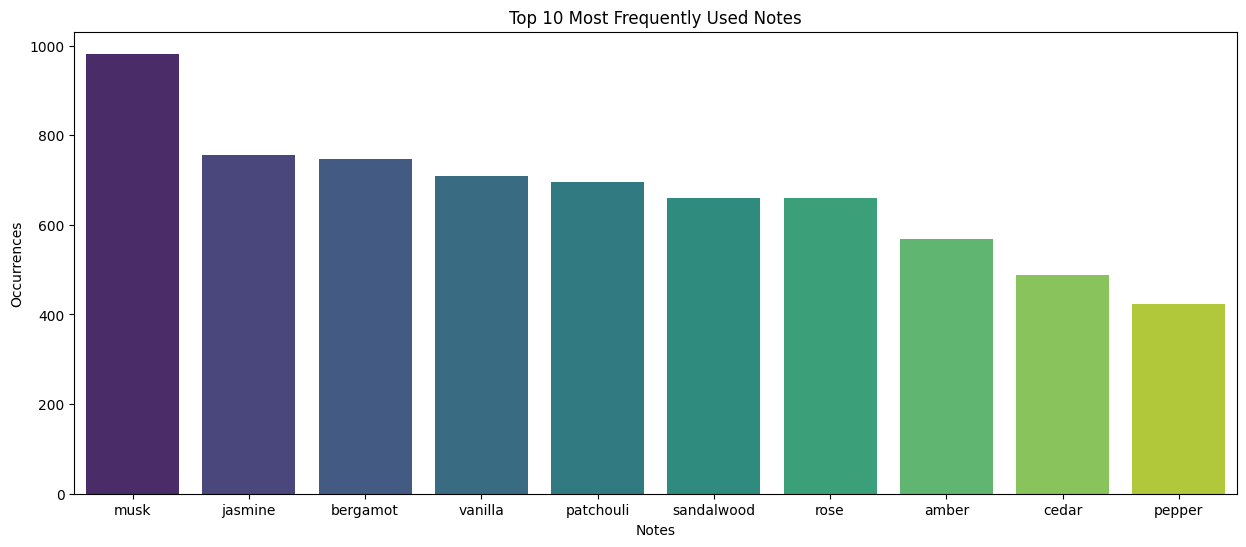

In [50]:
# Sum the occurrences of each note across all samples (axis=0) and Select the top 20 notes
top_notes = note_matrix.sum(axis=0).sort_values(ascending=False)
top_10_notes = top_notes.head(10)

# Remove "note" and replace underscores with spaces in the notes' names
top_10_notes_labels = top_10_notes.index

# Create a bar plot using seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x=top_10_notes_labels, y=top_10_notes.values, palette='viridis')

# Add labels and title
plt.xlabel('Notes')
plt.ylabel('Occurrences')
plt.title('Top 10 Most Frequently Used Notes')

plt.show()

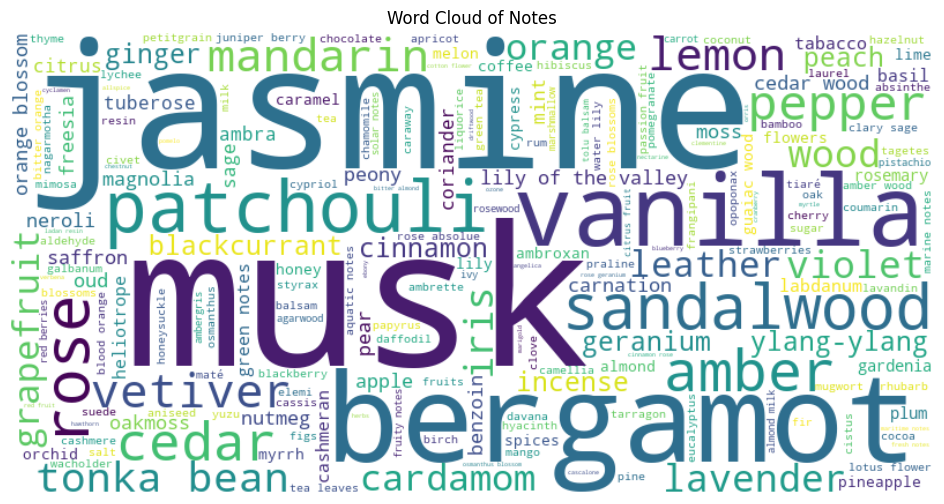

In [51]:
# Convert the 'top_notes' Series to a DataFrame
notes_occurrences = pd.DataFrame(top_notes, columns=['occurrences'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(notes_occurrences['occurrences'])

# Display the word cloud
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Notes')
plt.show()

* Top 10 popular women's perfumes

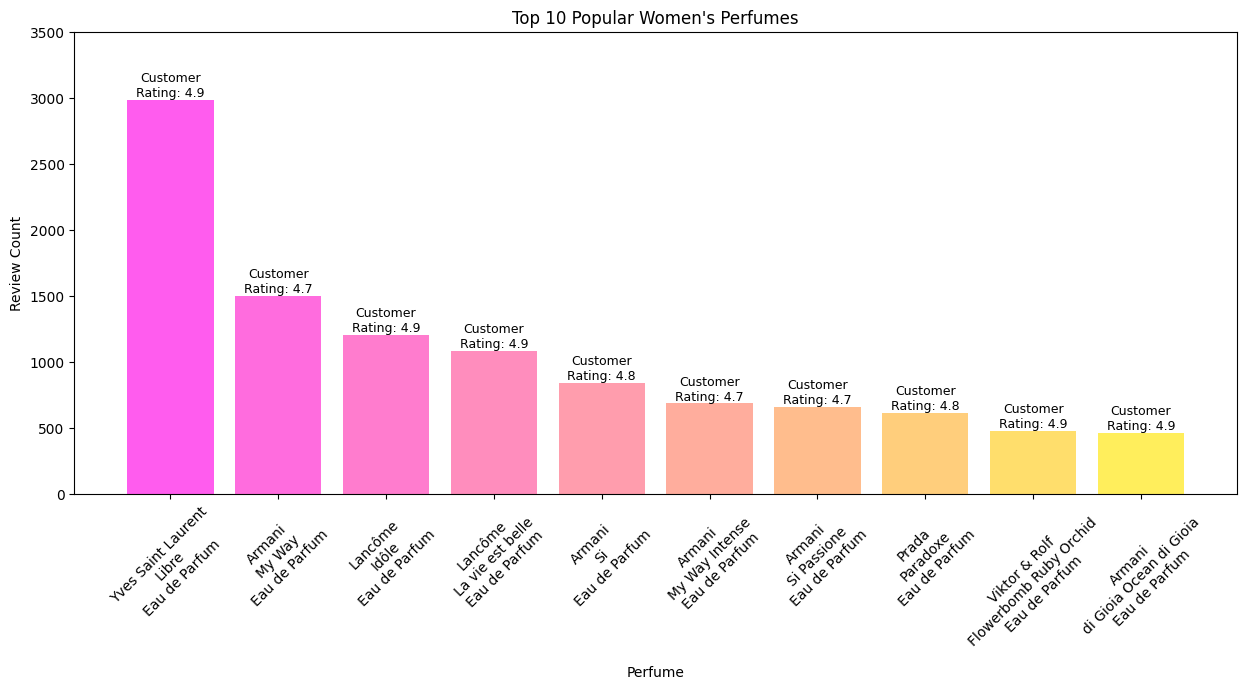

In [52]:
# Filter the DataFrame for women's perfumes
women_perfumes = df[df['gender'] == 'Women']

# Sort the DataFrame by review_count in descending order and take the top 10 rows
top_women_perfumes = women_perfumes.sort_values(by='review_count', ascending=False).head(10)

# Reset the index of the top_women_perfumes DataFrame
top_women_perfumes.reset_index(drop=True, inplace=True)

# Combine brand and name to create a new column for x-axis label with names in two lines
top_women_perfumes['perfume_label'] = top_women_perfumes['brand'] + '\n' + top_women_perfumes['name'] + '\n' + top_women_perfumes['category']

# Define different colors for the bars
colors = sns.color_palette("spring", 10)

# Plot the top 10 popular women's perfumes with different bar colors
plt.figure(figsize=(15, 6))
bar_plot = plt.bar(top_women_perfumes['perfume_label'], top_women_perfumes['review_count'], color=colors, alpha=0.7)
plt.title("Top 10 Popular Women's Perfumes")
plt.xlabel("Perfume")
plt.ylabel("Review Count")
plt.xticks(rotation=45)

# Set the maximum limit for the y-axis (review count) to 3500
plt.ylim(0, 3500)

# Add customer rating on each column
for index, row in top_women_perfumes.iterrows():
    plt.text(index, row['review_count'], f"Customer\nRating: {row['customer_rating']}", ha='center', va='bottom', color='black', fontsize=9)

plt.show()

* Top 10 popular men's perfumes

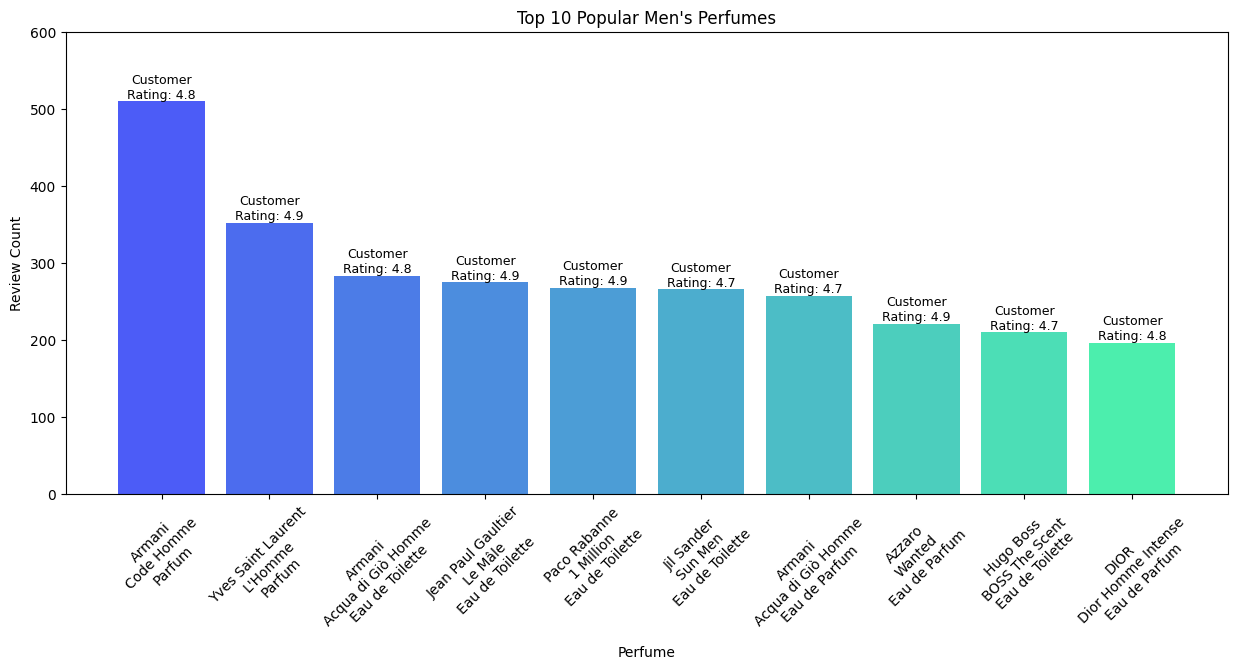

In [53]:
men_perfumes = df[df['gender'] == 'Men']
top_men_perfumes = men_perfumes.sort_values(by='review_count', ascending=False).head(10)
top_men_perfumes.reset_index(drop=True, inplace=True)
top_men_perfumes['perfume_label'] = top_men_perfumes['brand'] + '\n' + top_men_perfumes['name'] + '\n' + top_men_perfumes['category']
colors = sns.color_palette("winter", 10)
plt.figure(figsize=(15, 6))
bar_plot = plt.bar(top_men_perfumes['perfume_label'], top_men_perfumes['review_count'], color=colors, alpha=0.7)
plt.title("Top 10 Popular Men's Perfumes")
plt.xlabel("Perfume")
plt.ylabel("Review Count")
plt.xticks(rotation=45)
plt.ylim(0, 600)
for index, row in top_men_perfumes.iterrows():
    plt.text(index, row['review_count'], f"Customer\nRating: {row['customer_rating']}", ha='center', va='bottom', color='black', fontsize=9)
plt.show()

* Top 10 popular unisex perfumes

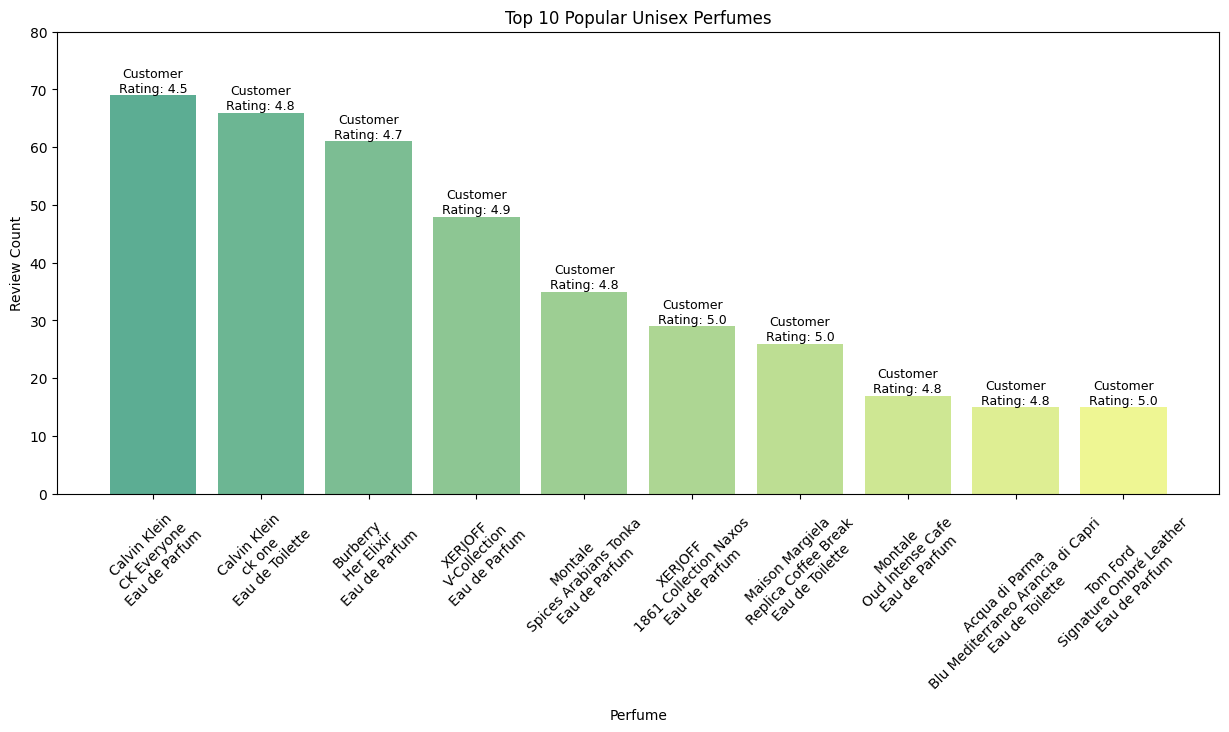

In [54]:
unisex_perfumes = df[df['gender'] == 'Unisex']
top_unisex_perfumes = unisex_perfumes.sort_values(by='review_count', ascending=False).head(10)
top_unisex_perfumes.reset_index(drop=True, inplace=True)
top_unisex_perfumes['perfume_label'] = top_unisex_perfumes['brand'] + '\n' + top_unisex_perfumes['name'] + '\n' + top_unisex_perfumes['category']
colors = sns.color_palette("summer", 10)
plt.figure(figsize=(15, 6))
bar_plot = plt.bar(top_unisex_perfumes['perfume_label'], top_unisex_perfumes['review_count'], color=colors, alpha=0.7)
plt.title("Top 10 Popular Unisex Perfumes")
plt.xlabel("Perfume")
plt.ylabel("Review Count")
plt.xticks(rotation=45)
plt.ylim(0, 80)
for index, row in top_unisex_perfumes.iterrows():
    plt.text(index, row['review_count'], f"Customer\nRating: {row['customer_rating']}", ha='center', va='bottom', color='black', fontsize=9)
plt.show()

* Top 10 popular EDP

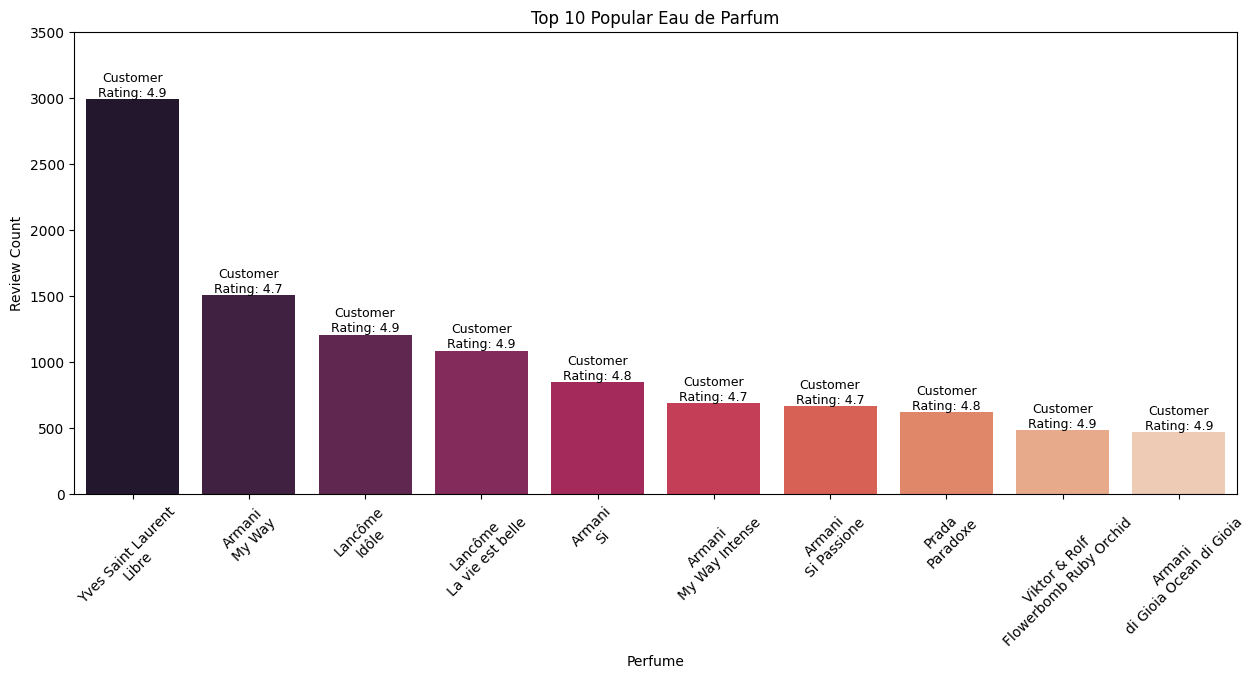

In [55]:
edp_perfumes = df[(df['category'] == 'Eau de Parfum')]
top_edp_perfumes = edp_perfumes.sort_values(by='review_count', ascending=False).head(10)
top_edp_perfumes.reset_index(drop=True, inplace=True)
top_edp_perfumes['perfume_label'] = top_edp_perfumes['brand'] + '\n' + top_edp_perfumes['name']
colors = sns.color_palette('rocket', 10)
plt.figure(figsize=(15, 6))
sns.barplot(x=top_edp_perfumes['perfume_label'], y=top_edp_perfumes['review_count'], palette=colors)
plt.title("Top 10 Popular Eau de Parfum")
plt.xlabel("Perfume")
plt.ylabel("Review Count")
plt.ylim(0, 3500)
for index, row in top_edp_perfumes.iterrows():
    plt.text(index, row['review_count'], f"Customer\nRating: {row['customer_rating']}", ha='center', va='bottom', color='black', fontsize=9)
plt.xticks(rotation=45)
plt.show()

* Top 10 popular Parfum

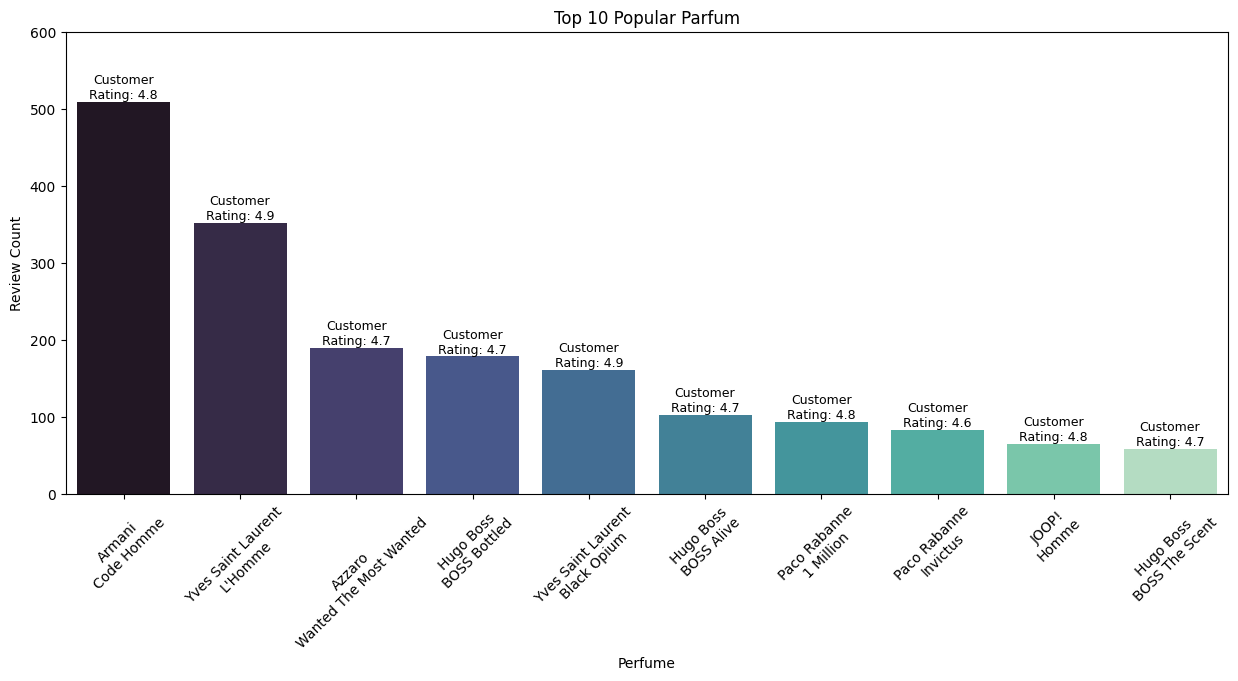

In [56]:
parfum_perfumes = df[(df['category'] == 'Parfum')]
top_parfum_perfumes = parfum_perfumes.sort_values(by='review_count', ascending=False).head(10)
top_parfum_perfumes.reset_index(drop=True, inplace=True)
top_parfum_perfumes['perfume_label'] = top_parfum_perfumes['brand'] + '\n' + top_parfum_perfumes['name']
colors = sns.color_palette("mako", 10)
plt.figure(figsize=(15, 6))
sns.barplot(x=top_parfum_perfumes['perfume_label'], y=top_parfum_perfumes['review_count'], palette=colors)
plt.title("Top 10 Popular Parfum")
plt.xlabel("Perfume")
plt.ylabel("Review Count")
plt.ylim(0, 600)
for index, row in top_parfum_perfumes.iterrows():
    plt.text(index, row['review_count'], f"Customer\nRating: {row['customer_rating']}", ha='center', va='bottom', color='black', fontsize=9)
plt.xticks(rotation=45)
plt.show()

* Top 10 Popular EDT

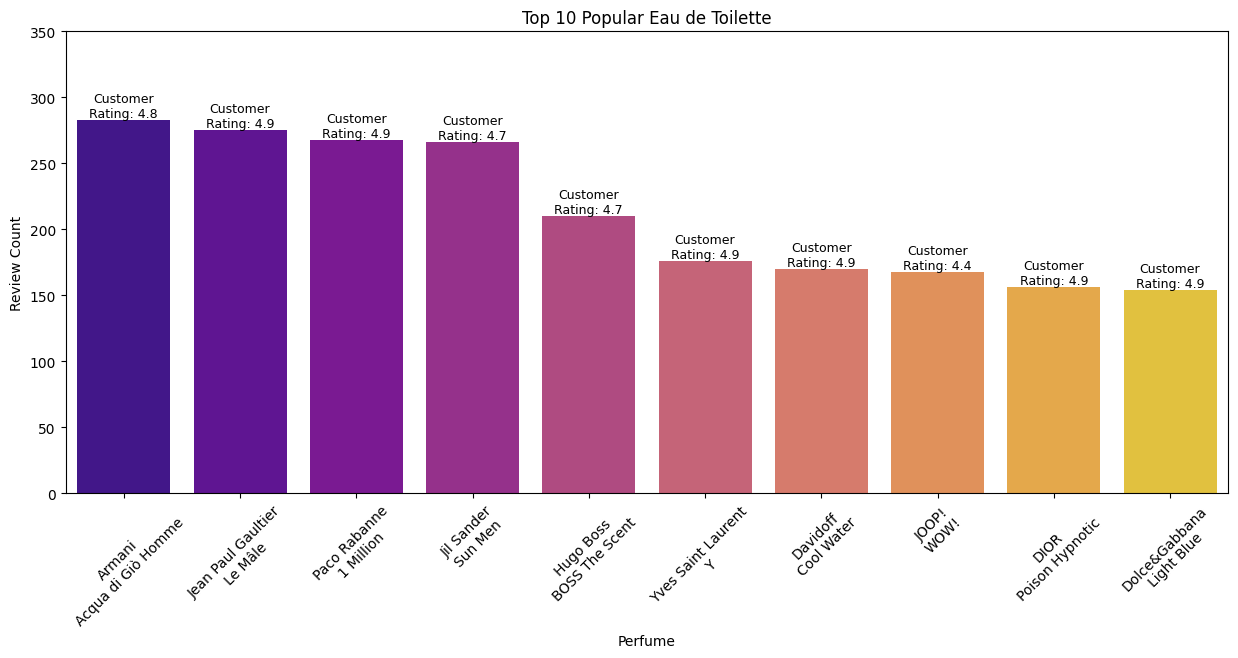

In [57]:
edt_perfumes = df[(df['category'] == 'Eau de Toilette')]
top_edt_perfumes = edt_perfumes.sort_values(by='review_count', ascending=False).head(10)
top_edt_perfumes.reset_index(drop=True, inplace=True)
top_edt_perfumes['perfume_label'] = top_edt_perfumes['brand'] + '\n' + top_edt_perfumes['name']
colors = sns.color_palette("plasma", 10)
plt.figure(figsize=(15, 6))
sns.barplot(x=top_edt_perfumes['perfume_label'], y=top_edt_perfumes['review_count'], palette=colors)
plt.title("Top 10 Popular Eau de Toilette")
plt.xlabel("Perfume")
plt.ylabel("Review Count")
plt.ylim(0, 350)
for index, row in top_edt_perfumes.iterrows():
    plt.text(index, row['review_count'], f"Customer\nRating: {row['customer_rating']}", ha='center', va='bottom', color='black', fontsize=9)
plt.xticks(rotation=45)
plt.show()

* Brand vs. number of perfumes

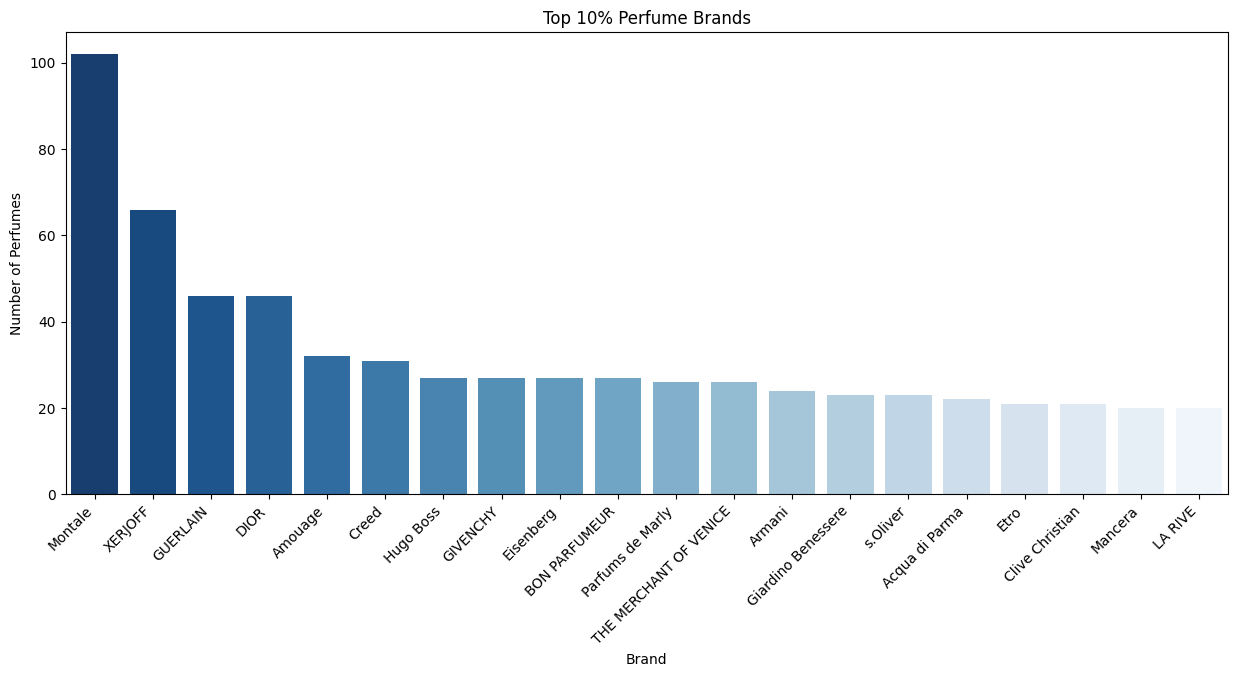

In [58]:
# Group by brand and count the number of perfumes for each brand
perfumes_by_brand = df.groupby('brand')['perfume_id'].count().sort_values(ascending=False)

# Select the top 30 perfume brands
top_30_brands = perfumes_by_brand.head(20)

# Plot the top 20 perfume brands with a bar plot using seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x=top_30_brands.index, y=top_30_brands.values, palette='Blues_r')
plt.xticks(rotation=45, ha="right")

plt.title("Top 10% Perfume Brands")
plt.xlabel("Brand")
plt.ylabel("Number of Perfumes")
plt.show()

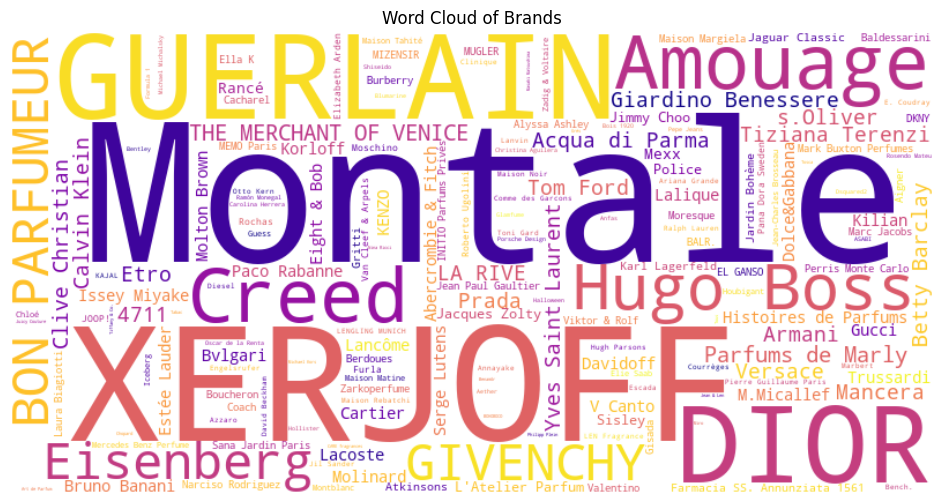

In [59]:
# Calculate the frequencies of each brand in the 'brand' column
brand_frequencies = df['brand'].value_counts()

# Generate the word cloud for brands
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate_from_frequencies(brand_frequencies)

# Display the word cloud
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Brands')
plt.show()

### Data Visualization with Tableau

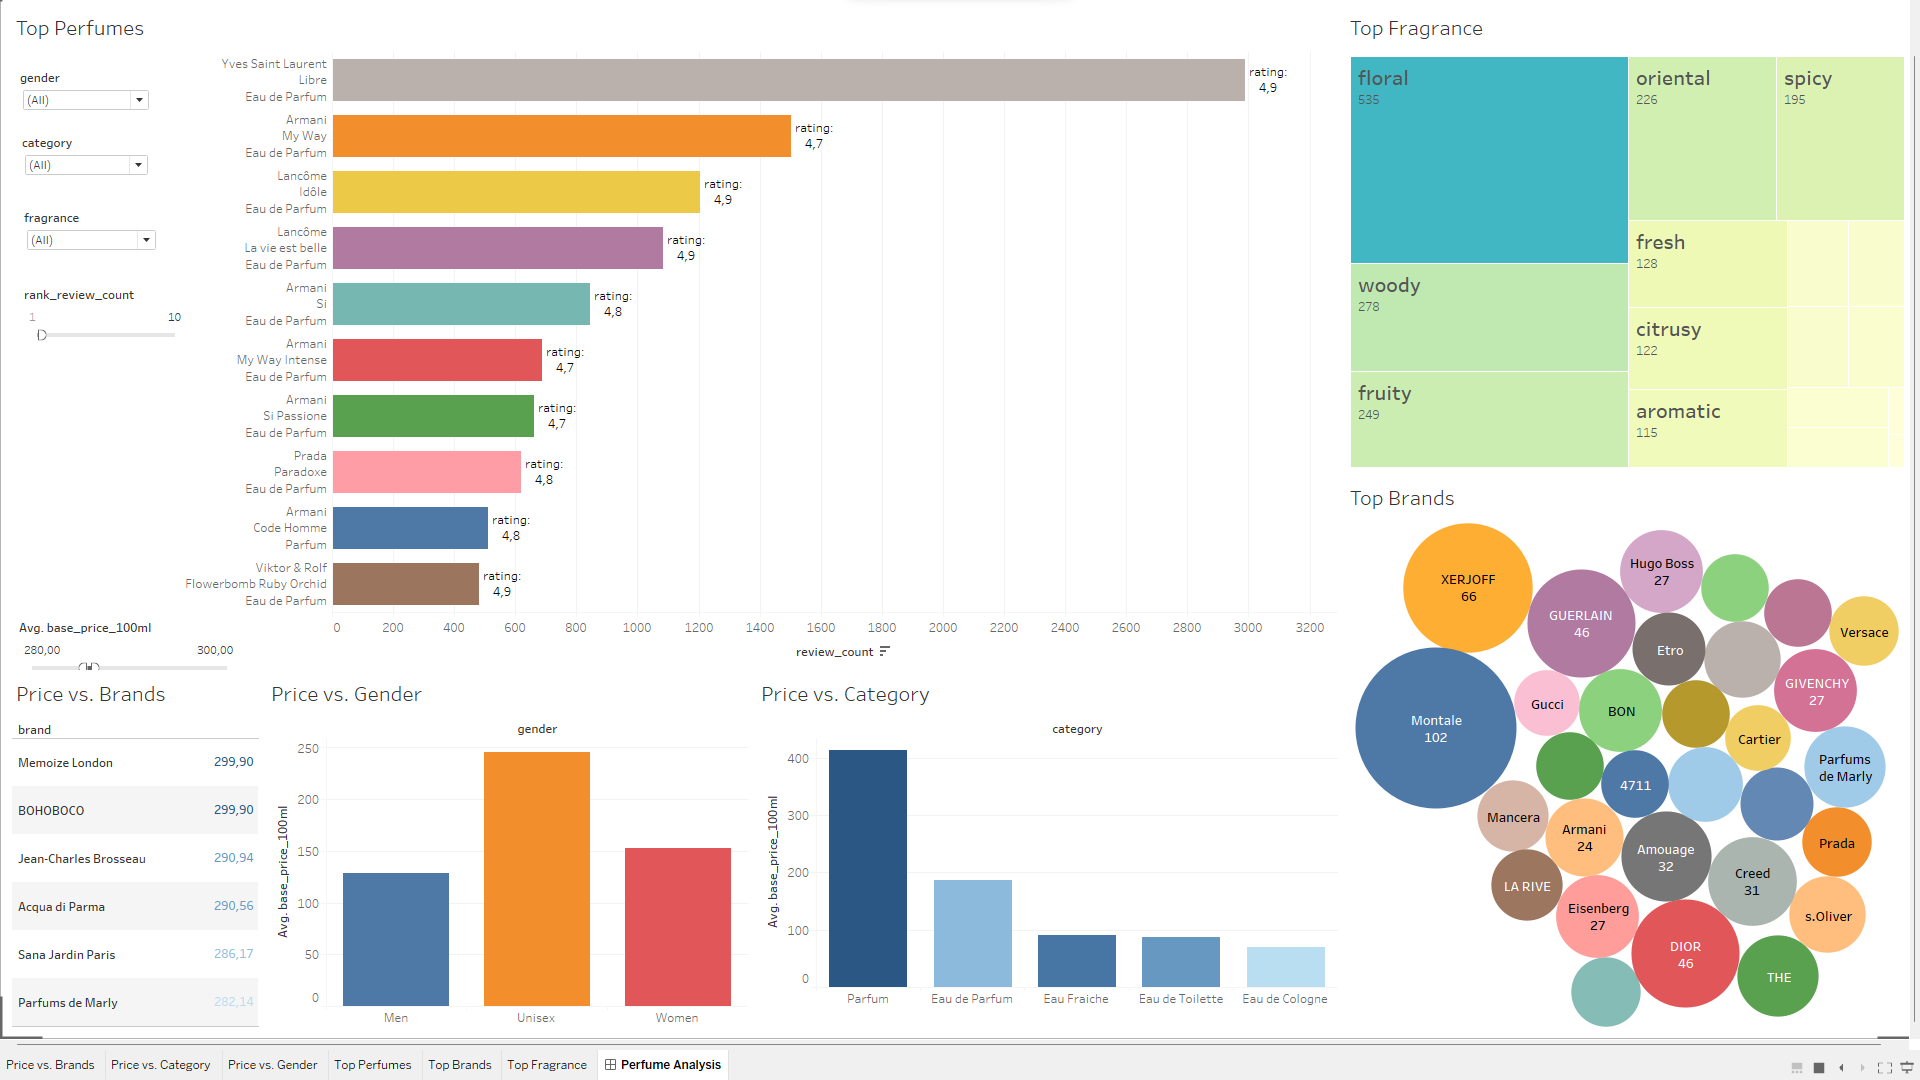

# **Data Processing**

##### `Fragrance` - fill the missing values with more web scraping

In [60]:
url = 'https://en.parfumdreams.de/Fragrances'

# Send a GET request to the URL and parse the HTML content
r = requests.get(url)
soup = BeautifulSoup(r.content, 'html.parser')

# Find the HTML code containing the fragrance values
selector = '#attrFilterDuftrichtung > div.dropdown-items-content'
html_code = soup.select_one(selector)

# Initialize an empty list to store the information
fragrance_list = []

# Find all the item values and extract the name, number, and max_pages for each fragrance
item_values = html_code.find_all('span', class_='item-value')
max_pages = [3, 2, 27, 6, 1, 12, 12, 2, 23, 1, 2, 1, 1, 3, 9, 7, 8, 1, 1, 1, 1, 2, 12, 2, 1, 1]

for i, item in enumerate(item_values):
    # Extract the name of the fragrance
    name = item.text
    # Extract the number of the fragrance from the input value attribute
    number = re.search(r'/Fragrances\?att_duftrichtung=(\d+)', str(item.find_next_sibling('input'))).group(1)
    # Append the fragrance information to the list
    fragrance_list.append((name, number, max_pages[i]))

print(fragrance_list)

[('amber', '3206', 3), ('aquatic', '3212', 2), ('floral', '2159', 27), ('floral', '3221', 6), ('fougère', '3222', 1), ('fresh', '2166', 12), ('fruity ', '2167', 12), ('gourmand', '3228', 2), ('wooden', '2169', 23), ('intensive', '251', 1), ('leathery', '3191', 2), ('mossy', '2173', 1), ('heavy', '262', 1), ('sweet', '2180', 3), ('spicy', '2182', 9), ('citrusy', '2184', 7), ('arromatic', '3343', 8), ('classic', '3348', 1), ('creamy', '3344', 1), ('earthy', '3345', 1), ('exotic', '3346', 1), ('green', '3347', 2), ('oriental', '3349', 12), ('powdery', '3350', 2), ('smoky', '3351', 1), ('sporty', '3352', 1)]


In [61]:
# Initialize an empty list to store the perfume fragrance information
fragrance_links = []

In [ ]:
### Since it is too slow to web scrape thee whole package, I decided to web scrape each fragrance individually

In [ ]:
# # Fragrance - amber/3206/3
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=3206&p={}'
# for page in range(1, 4):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'amber') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - aquatic/3212/2
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=3212&p={}'
# for page in range(1, 3):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'aquatic') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - floral/2159/27
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=2159&p={}'
# for page in range(1, 28):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'floral') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - floral/3221/6
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=3221&p={}'
# for page in range(1, 7):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'floral') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - fougère/3222/1
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=3222&p={}'
# for page in range(1, 2):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'fougère') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - fresh/2166/12
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=2166&p={}'
# for page in range(1, 13):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'fresh') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - fruity/2167/12
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=2167&p={}'
# for page in range(1, 13):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'fruity') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - gourmand/3228/2
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=3228&p={}'
# for page in range(1, 3):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'gourmand') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - wooden/2169/23
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=2169&p={}'
# for page in range(1, 24):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'wooden') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - intensive/251/1
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=251&p={}'
# for page in range(1, 2):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'intensive') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - leathery/3191/2
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=3191&p={}'
# for page in range(1, 3):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'leathery') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - mossy/2173/1
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=2173&p={}'
# for page in range(1, 2):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'mossy') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - heavy/262/1
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=262&p={}'
# for page in range(1, 2):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'heavy') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - sweet/2180/3
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=2180&p={}'
# for page in range(1, 4):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'sweet') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - spicy/2182/9
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=2182&p={}'
# for page in range(1, 10):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'spicy') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - citrusy/2184/7
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=2184&p={}'
# for page in range(1, 8):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'citrusy') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - arromatic/3343/8
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=3343&p={}'
# for page in range(1, 9):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'arromatic') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - classic/3348/1
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=3348&p={}'
# for page in range(1, 2):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'classic') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - creamy/3344/1
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=3344&p={}'
# for page in range(1, 2):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'creamy') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - earthy/3345/1
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=3345&p={}'
# for page in range(1, 2):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'earthy') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - exotic/3346/1
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=3346&p={}'
# for page in range(1, 2):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'exotic') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - green/3347/2
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=3347&p={}'
# for page in range(1, 3):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'green') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - oriental/3349/12
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=3349&p={}'
# for page in range(1, 13):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'oriental') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - powdery/3350/2
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=3350&p={}'
# for page in range(1, 3):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'powdery') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - smoky/3351/2
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=3351&p={}'
# for page in range(1, 3):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'smoky') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# # Fragrance - sporty/3352/1
# base_url = 'https://en.parfumdreams.de/Fragrances?att_duftrichtung=3352&p={}'
# for page in range(1, 2):
#     url = base_url.format(page)
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'html.parser')
#     for child_num in range(1, 96):
#         selector = f'#CategoryBoxItem > div.cw.clearfix > div:nth-child({child_num}) > div.product-image.c.d-12 > a'
#         elements = soup.select(selector)
#         links = [(element['href'], 'sporty') for element in elements]
#         fragrance_links.extend(links)

In [ ]:
# df_fragrance_links = pd.DataFrame(fragrance_links, columns=['url', 'fragrance'])
# df_fragrance_links.to_csv('fragrance_links.csv', index=False)

In [62]:
# Load perfume (url) and corresponding fragrance data
df_fragrance = pd.read_csv('data/fragrance_links.csv')
df_fragrance.shape

(3838, 2)

In [63]:
# Checking for duplicates in the 'url' column of df_fragrance
duplicates = df_fragrance[df_fragrance.duplicated(subset='url', keep=False)]
len(duplicates)

2960

In [64]:
# Checking new fragrance categories' unique values
df_fragrance.fragrance.unique()

array(['amber', 'aquatic', 'floral', 'fougère', 'fresh', 'fruity',
       'gourmand', 'wooden', 'intensive', 'leathery', 'mossy', 'heavy',
       'sweet', 'spicy', 'citrusy', 'arromatic', 'classic', 'creamy',
       'earthy', 'exotic', 'green', 'oriental', 'powdery', 'smoky',
       'sporty'], dtype=object)

In [65]:
# Checking the initial fragrance categories' unique values
df.fragrance.value_counts()

fragrance
floral       258
wooden       105
oriental      48
fresh         47
spicy         39
arromatic     38
citrusy       32
fruity        29
amber         10
sweet         10
fougère        9
leathery       9
aquatic        8
gourmand       8
powdery        3
classic        3
green          2
exotic         1
Name: count, dtype: int64

In [66]:
# Cleaning and reduction the fragrance categories
df.loc[df['fragrance']=='wooden' , 'fragrance'] = 'woody'
df_fragrance.loc[df_fragrance['fragrance']=='wooden' , 'fragrance'] = 'woody'
df.loc[df['fragrance']=='amber' , 'fragrance'] = 'oriental'
df.loc[df['fragrance']=='arromatic' , 'fragrance'] = 'aromatic'
df_fragrance.loc[df_fragrance['fragrance']=='arromatic' , 'fragrance'] = 'aromatic'
df.loc[df['fragrance']=='fougère' , 'fragrance'] = 'aromatic'

In [67]:
# In order to make the fragrance more balanced, use the ascending order of the fragrance value counts in df

# Calculate fragrance value counts in ascending order
fragrance_counts = df['fragrance'].value_counts().sort_values(ascending=True)

# List of fragrances to keep
fragrance_values_to_keep = fragrance_counts.index.tolist()

# Create a dictionary to store the priority value for each fragrance
fragrance_priority = {fragrance: index for index, fragrance in enumerate(fragrance_values_to_keep)}

# Define a function to determine the priority value of a fragrance
def get_fragrance_priority(fragrance):
    return fragrance_priority.get(fragrance, len(fragrance_values_to_keep))

# Drop rows in df_fragrance where fragrance value is not in the specified list
mask = ~df_fragrance['fragrance'].isin(fragrance_values_to_keep)

# Filter the DataFrame and keep only the rows where the 'fragrance' value is not in the specified list
df_fragrance_filtered = df_fragrance[~mask]

# Drop duplicates in the 'url' column and keep the row with the highest priority fragrance value
df_fragrance_filtered.sort_values(by='fragrance', key=lambda col: col.map(get_fragrance_priority), inplace=True)
df_fragrance_filtered.drop_duplicates(subset='url', keep='first', inplace=True)

In [68]:
# Checking filtered data
df_fragrance_filtered.shape

(2161, 2)

In [69]:
# Merge the DataFrames to the initial dataset on the 'url' column and perform a left join
merged_df = df.merge(df_fragrance_filtered[['url', 'fragrance']], on='url', how='left', indicator=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   perfume_id       2115 non-null   object  
 1   brand            2115 non-null   object  
 2   name             2115 non-null   object  
 3   category         2115 non-null   object  
 4   gender           2115 non-null   object  
 5   base_price       2115 non-null   float64 
 6   notes            2115 non-null   object  
 7   top_note         2080 non-null   object  
 8   heart_note       2070 non-null   object  
 9   base_note        2077 non-null   object  
 10  fragrance_x      659 non-null    object  
 11  customer_rating  2115 non-null   float64 
 12  review_count     2115 non-null   int32   
 13  url              2115 non-null   object  
 14  image            2115 non-null   object  
 15  fragrance_y      1670 non-null   object  
 16  _merge           2115 non-null   category


In [70]:
# Replace the missing values in the 'fragrance_x' column with the values from the 'fragrance_y' column
merged_df['fragrance_x'].fillna(merged_df['fragrance_y'], inplace=True)

# Drop the unnecessary columns 'fragrance_y', and '_merge' from the merged DataFrame
merged_df.drop(columns=['fragrance_y', '_merge'], inplace=True)

# Rename the 'fragrance_x' column to 'fragrance'
merged_df.rename(columns={'fragrance_x': 'fragrance'}, inplace=True)

In [71]:
# Checking merged fragrance values
merged_df.fragrance.value_counts()

fragrance
floral      272
fruity      249
oriental    201
woody       193
spicy       189
fresh       124
citrusy     119
aromatic    107
sweet        48
powdery      45
aquatic      42
leathery     39
gourmand     38
green        37
classic       7
exotic        5
Name: count, dtype: int64

# **Data Modeling and Model Evaluation**

##### `Fragrance` - fill the rest missing values with model prediction


In [72]:
## After checking the test results with the initial data and merged_data, I found the test metrics with the initial data is significant higher than the merged data. Thus, I decided to use the initial data for the model prediction

# Use data from df with non-NaN "fragrance" values for training and testing
df_train = df.dropna(subset=['fragrance'])

In [73]:
# X-y split for training set
X_train = df_train['notes']
y_train = df_train['fragrance']

In [74]:
# Encode 'fragrance' class labels to integers using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [75]:
# Convert 'notes' text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

In [76]:
# Train test split for training set
X_train, X_test, y_train, y_test = train_test_split(X_train_vectorized, y_train_encoded, test_size=0.2)

* KNN model

In [77]:
# Train the KNN classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [78]:
# Define a function to evaluate different models
def evaluate_model(model, X_test, y_test, label_encoder):
    # Make predictions on the test set
    y_test_pred_encoded = model.predict(X_test)
    # Convert the predicted numeric labels back to their original class labels for evaluation
    y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded)

    # Calculate evaluation metrics for the test set
    accuracy_test = accuracy_score(label_encoder.inverse_transform(y_test), y_test_pred)
    precision_test = precision_score(label_encoder.inverse_transform(y_test), y_test_pred, average='weighted')
    recall_test = recall_score(label_encoder.inverse_transform(y_test), y_test_pred, average='weighted')
    f1_test = f1_score(label_encoder.inverse_transform(y_test), y_test_pred, average='weighted')

    # Print evaluation metrics
    print("Test Set Metrics:")
    print("Accuracy:", accuracy_test)
    print("Precision:", precision_test)
    print("Recall:", recall_test)
    print("F1-Score:", f1_test)

    return accuracy_test, precision_test, recall_test, f1_test

In [79]:
# Define a function to plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Visualize the confusion matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [80]:
# Evaluate KNN model
accuracy_knn, precision_knn, recall_knn, f1_knn = evaluate_model(knn_classifier, X_test, y_test, label_encoder)

Test Set Metrics:
Accuracy: 0.5075757575757576
Precision: 0.4529040404040404
Recall: 0.5075757575757576
F1-Score: 0.46527496994495754


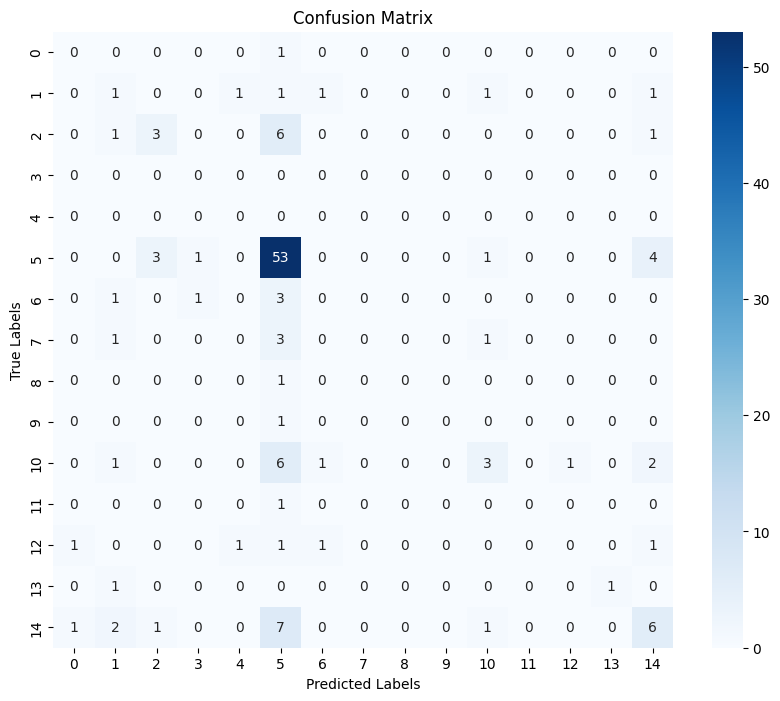

In [81]:
# Plot Confusion Matrix KNN
knn_preds = knn_classifier.predict(X_test)
plot_confusion_matrix(y_test, knn_preds, 'KNN')

* Random Forest model

In [82]:
# Train the RandomForest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Evaluate RandomForest model
accuracy_rf, precision_rf, recall_rf, f1_rf = evaluate_model(rf_classifier, X_test, y_test, label_encoder)

Test Set Metrics:
Accuracy: 0.5151515151515151
Precision: 0.4236944222281465
Recall: 0.5151515151515151
F1-Score: 0.43152803545660684


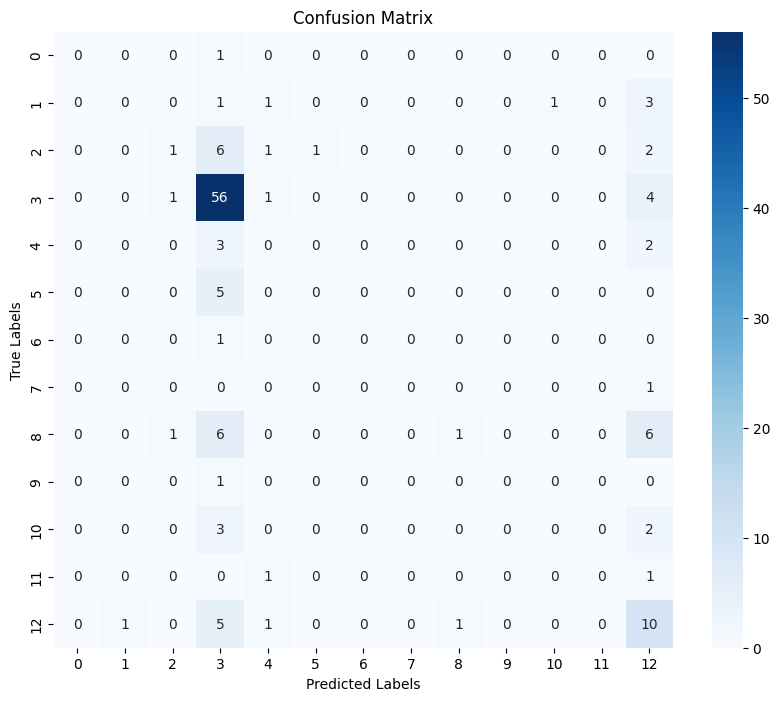

In [83]:
# Plot Confusion Matrix for Random Forest
rf_preds = rf_classifier.predict(X_test)
plot_confusion_matrix(y_test, rf_preds, 'Random Forest')

* XGBoost model

In [84]:
# Train the XGBoost classifier
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=len(df_train['fragrance'].unique()))
xgb_classifier.fit(X_train, y_train)

# Evaluate XGBoost model
accuracy_xgb, precision_xgb, recall_xgb, f1_xgb = evaluate_model(xgb_classifier, X_test, y_test, label_encoder)

Test Set Metrics:
Accuracy: 0.49242424242424243
Precision: 0.46913730491579886
Recall: 0.49242424242424243
F1-Score: 0.478813575924959


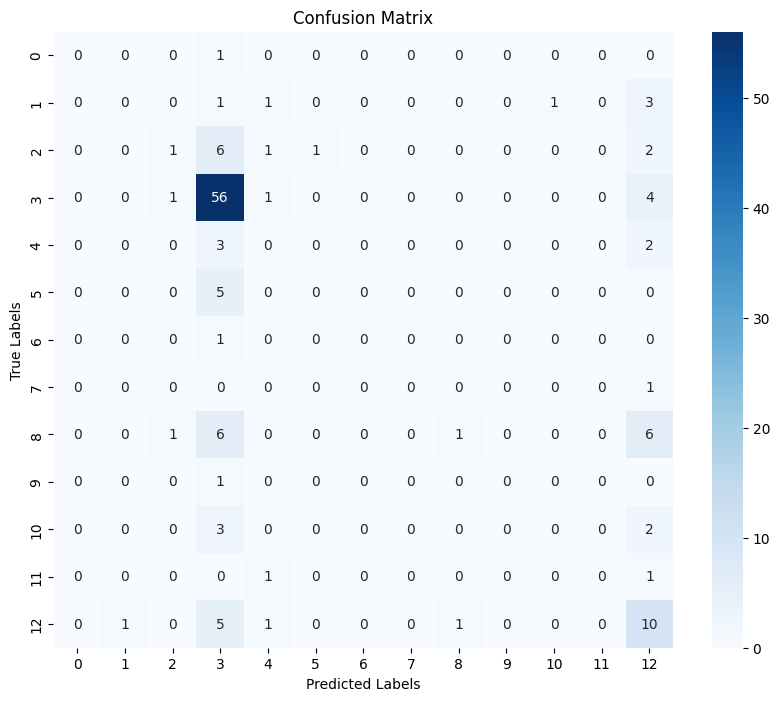

In [85]:
# Plot Confusion Matrix for XGBoost
xgb_preds = rf_classifier.predict(X_test)
plot_confusion_matrix(y_test, xgb_preds, 'XGBoost')

* The best model is Random Forest, use it to predict the rest missing values in `fragrance`

In [88]:
# Improve the model with Hyperparameter tuning

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameter values
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy_test, precision_test, recall_test, f1_test = evaluate_model(best_rf_classifier, X_test, y_test, label_encoder)

print("Best Hyperparameters:", best_params)

Test Set Metrics:
Accuracy: 0.5227272727272727
Precision: 0.463914353620236
Recall: 0.5227272727272727
F1-Score: 0.4597879116512657
Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [89]:
# Predict missing values for 'fragrance' in merged_df
df_predict = merged_df[merged_df['fragrance'].isnull()]
X_predict = df_predict['notes']
X_predict_vectorized = vectorizer.transform(X_predict)
y_predict_encoded = best_rf_classifier.predict(X_predict_vectorized)
y_predict = label_encoder.inverse_transform(y_predict_encoded)

# Fill missing values in the merged_df
merged_df.loc[merged_df['fragrance'].isnull(), 'fragrance'] = y_predict

# Save the complete DataFrame to a CSV file
merged_df.to_csv('data/perfume_final.csv', index=False)

# **Perfume Apps**

### Perfume Finder

In [90]:
# Loading the final dataset
df = pd.read_csv('data/perfume_final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   perfume_id       2115 non-null   int64  
 1   brand            2115 non-null   object 
 2   name             2115 non-null   object 
 3   category         2115 non-null   object 
 4   gender           2115 non-null   object 
 5   base_price       2115 non-null   float64
 6   notes            2115 non-null   object 
 7   top_note         2080 non-null   object 
 8   heart_note       2070 non-null   object 
 9   base_note        2077 non-null   object 
 10  fragrance        2115 non-null   object 
 11  customer_rating  2115 non-null   float64
 12  review_count     2115 non-null   int64  
 13  url              2115 non-null   object 
 14  image            2115 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 248.0+ KB


* Perfume finder based on brand and name of perfume

In [91]:
# Define a function to search perfumes based on user input brand and name information
def search_perfume_info():
    user_input = input('Enter the brand or name of the perfume: ')
    # Convert the user input to lowercase
    input_str = user_input.lower()
  
    # Combine 'brand' and 'name' columns into a new 'brand_name' column and convert to lowercase
    df['brand_name'] = df['brand'].str.lower() + ' ' + df['name'].str.lower()

    mask = df['brand_name'].apply(lambda x: all(word in x for word in input_str.split()))

    # Filter the DataFrame based on the mask
    results = df[mask]

    # Drop the 'brand_name' column to keep the original DataFrame unchanged
    df.drop(columns=['brand_name'], inplace=True)

    if results.empty:
        print('No perfumes found matching the input.')
    else:
        # Sort the results by customer_rating and review_count
        results.sort_values(by=['customer_rating', 'review_count'], ascending=[False, False], inplace=True)

        # Convert the image URLs to image tags for display
        results['image'] = results['image'].apply(lambda url: f'<img src="{url}" width="100" height="100">')

        # Split the multiple words in top_note, heart_note, and base_note and display each word on a separate line
        for col in ['top_note', 'heart_note', 'base_note']:
            results[col] = results[col].str.replace(', ', '<br>').fillna('')
        
        # Convert the values in the 'base_price' column to 1/10 of the original values
        results['base_price'] = round(results['base_price'] / 10, 2).apply(lambda price: f'{price} €')      

        # Rename the columns
        results.rename(columns={'top_note': 'top note', 'heart_note': 'heart note',
                                'base_note': 'base note', 'base_price': 'price per 100ml',
                                'customer_rating': 'customer rating', 'review_count': 'review count'}, inplace=True)
        
        # Show the desired information for the matching perfumes
        columns_to_show = ['image', 'brand', 'name', 'category', 'gender', 'fragrance', 'top note', 'heart note', 'base note', 'price per 100ml', 'customer rating', 'review count']

        # Reset the index to use the 'id' column as the index
        results.index.name = 'id'

        # Display the table
        display(HTML(results[columns_to_show].to_html(escape=False)))

        return

In [92]:
# Example usage:
search_perfume_info()

,image,brand,name,category,gender,fragrance,top note,heart note,base note,price per 100ml,customer rating,review count
id,,,,,,,,,,,,
41,,Prada,Luna Rossa Carbon,Eau de Toilette,Men,aromatic,bergamotpepper,lavandinaquatic notes,patchouliambroxan,153.9 €,5.0,26
48,,Prada,Luna Rossa Sport,Eau de Toilette,Men,spicy,wacholder,lavender,tonka beanvanilla,129.9 €,5.0,12
97,,Prada,L'Homme L'Eau,Eau de Toilette,Men,woody,gingerneroli,irisambroxan,sandalwoodcedarpowder,108.95 €,5.0,9
1535,,Prada,Les Infusions,Eau de Parfum,Unisex,oriental,galbanummandarinorange,irisvetivercedar,incensebenzoin,146.95 €,5.0,8
88,,Prada,Luna Rossa Ocean,Eau de Parfum,Men,woody,grapefruit,incense,vanilla,175.9 €,5.0,7
1010,,Prada,La Femme Intense,Eau de Parfum,Women,floral,patchoulituberoseylang-ylang,,,249.9 €,5.0,4
1585,,Prada,Les Infusions Infusion d'Amande,Eau de Parfum,Unisex,floral,bergamotmandarin,aniseedheliotrope,musktonka bean,146.95 €,5.0,3
1743,,Prada,Les Infusions Fleur d'Oranger,Eau de Parfum,Unisex,fresh,mandarinneroli,tuberoseorange blossom,jasminemusk,146.95 €,5.0,2
18,,Prada,Luna Rossa Black,Eau de Parfum,Men,woody,bergamotangelica,patchouli,ambermusk,125.9 €,4.9,127


* Perfume finder based on certain perfume using cosine similarity

In [93]:
# Define a function to find the 5 similar perfumes as the user input perfume based on perfume notes

def find_similar_perfumes(top_n=6):
    # Ask the user to input the perfume ID
    input_perfume_id = int(input("Enter the perfume ID: "))

    # Find the notes of the input perfume using the given ID
    input_perfume_notes = df.loc[input_perfume_id, 'notes']
    
    # Vectorize the notes using TF-IDF
    vectorizer = TfidfVectorizer()
    notes_vectors = vectorizer.fit_transform(df['notes'])
    
    # Vectorize the notes of the input perfume
    input_vector = vectorizer.transform([input_perfume_notes])
    
    # Calculate cosine similarity between the input perfume and all other perfumes
    cosine_similarities = cosine_similarity(input_vector, notes_vectors).flatten()
    
    # Add cosine similarity as a new column to the DataFrame
    df['cosine_similarity'] = cosine_similarities
    
    # Sort the DataFrame based on cosine similarity in descending order
    similar_perfumes = df.sort_values(by='cosine_similarity', ascending=False)
    
    # Convert the image URLs to image tags for display
    similar_perfumes['image'] = similar_perfumes['image'].apply(lambda url: f'<img src="{url}" width="100" height="100">')

    # Split the multiple words in top_note, heart_note, and base_note and display each word on a separate line
    for col in ['top_note', 'heart_note', 'base_note']:
        similar_perfumes[col] = similar_perfumes[col].str.replace(', ', '<br>').fillna('')
    
    # Convert the values in the 'base_price' column to 1/10 of the original values
    similar_perfumes['base_price'] = round(similar_perfumes['base_price'] / 10, 2).apply(lambda price: f'{price} €')      

    # Rename the columns for better display
    similar_perfumes.rename(columns={'top_note': 'top note', 'heart_note': 'heart note',
                            'base_note': 'base note', 'base_price': 'price per 100ml', 'customer_rating': 'customer rating', 
                            'review_count': 'review count', 'cosine_similarity': 'cosine similarity'}, inplace=True)
    
    # Define the columns to show in the output table
    columns_to_show = ['image', 'brand', 'name', 'category', 'gender', 'fragrance', 'top note', 'heart note', 'base note', 'price per 100ml', 'customer rating', 'review count', 'cosine similarity']
    
    # Reset the index to use the 'id' column as the index
    similar_perfumes.index.name = 'id'

    # Display the table with the top N similar perfumes
    display(HTML(similar_perfumes.head(top_n)[columns_to_show].to_html(escape=False)))

    return

In [94]:
# Example usage:
find_similar_perfumes()

,image,brand,name,category,gender,fragrance,top note,heart note,base note,price per 100ml,customer rating,review count,cosine similarity
id,,,,,,,,,,,,,
97,,Prada,L'Homme L'Eau,Eau de Toilette,Men,woody,gingerneroli,irisambroxan,sandalwoodcedarpowder,108.95 €,5.0,9,1.000000
1503,,Montale,Ambra Amber Musk,Eau de Parfum,Unisex,woody,amber,muskpowder,ambercedar wood,135.0 €,3.4,5,0.596024
705,,Cartier,Baiser Volé,Parfum,Women,floral,lilytonka bean,lilytonka beanpowder,lilytonka beanpowder,118.95 €,5.0,1,0.506068
2047,,Farmacia SS. Annunziata 1561,New Collection Giardino dell'Iris,Parfum,Unisex,woody,bergamotlemon,amberirismyrrhelemi,cashmeranmuskvanillapowdercedar wood,161.95 €,5.0,1,0.453998
759,,Toni Gard,Iconic,Eau de Parfum,Women,woody,cedar,ambroxan,amber,77.72 €,5.0,1,0.435491
1655,,Courrèges,C,Eau de Parfum,Unisex,floral,,jasmine,ambroxan,233.17 €,0.0,0,0.392170


### Perfume Recommender

* Recommender based on input criteria

In [95]:
# Define a function to get the desired brand from the user
def get_brand():
    # Print a input message
    print("Enter brand (or press Enter to skip):")

    # Get user input for brand and convert to lowercase
    brand_input = input()
    brand = brand_input.lower()

    # Get unique brands from the DataFrame and convert them to lowercase for comparison
    all_brands = df['brand'].str.lower().unique()

    if brand_input:  # Check if there is a user input
        # Check if the lowercase brand input exists in the lowercase brands list
        if brand in all_brands:
            print(f"Selected brand: {brand}")
            return [brand]  # Return the brand as a list
        else:
            print("Sorry, we don't have the brand you want. Please enter another brand or skip.")
            return get_brand()  # Ask the user to input again
    else:
        print("No brand chosen. Getting all brands.")
        return all_brands.tolist()  # Return all the unique brands in the DataFrame as a list
    return


In [96]:
# Example usage:
input_brand = get_brand()
input_brand

Enter brand (or press Enter to skip):
Selected brand: dior


['dior']

In [97]:
# Define a function to get the desired categories from the user
def get_categories():
    all_categories = df['category'].unique()
    print("Available categories:")
    for i, category in enumerate(all_categories, start=1):
        print(f"{i}. {category}")

    categories = []
    max_choices = 5

    print("Choose up to 5 category numbers (or press Enter to skip):")
    while len(categories) < max_choices:
        choice = input()

        if not choice:  # Check if the input is empty (None or empty string)
            if len(categories) == 0:
                print("No category chosen. Getting all categories.")
                return all_categories.tolist()
            else:
                break

        try:
            choice = int(choice)
            if 1 <= choice <= len(all_categories):
                category = all_categories[choice - 1]
                categories.append(category)
                print(f"{category} added to the chosen categories.")
            else:
                print("Invalid category number. Please choose a valid number.")
        except ValueError:
            print("Invalid input. Please enter a valid category number.")

    if len(categories) > 0:
        print(f"Selected categories: {', '.join(categories)}")
    else:
        print("No categories selected.")
    return categories

In [98]:
# Example usage:
input_categories = get_categories()
input_categories

Available categories:
1. Eau de Toilette
2. Eau de Parfum
3. Parfum
4. Eau de Cologne
5. Eau Fraiche
Choose up to 5 category numbers (or press Enter to skip):
Eau de Parfum added to the chosen categories.
Parfum added to the chosen categories.
Selected categories: Eau de Parfum, Parfum


['Eau de Parfum', 'Parfum']

In [99]:
# Define a function to get the desired gender from the user
def get_gender():
    all_genders = df['gender'].unique()
    print("Available genders:")
    for i, gender in enumerate(all_genders, start=1):
        print(f"{i}. {gender}")

    genders = []
    max_choices = 3

    print("Choose a gender number (or press Enter to skip):")
    while len(genders) < max_choices:
        choice = input()

        if not choice:  # Check if the input is empty (None or empty string)
            if len(genders) == 0:
                print("No gender chosen. Getting all genders.")
                return all_genders.tolist()
            else:
                break

        try:
            choice = int(choice)
            if 1 <= choice <= len(all_genders):
                gender = all_genders[choice - 1]
                genders.append(gender)
                print(f"{gender} added to the chosen genders.")
            else:
                print("Invalid gender number. Please choose a valid number.")
        except ValueError:
            print("Invalid input. Please enter a valid gender number.")

    if len(genders) > 0:
        print(f"Selected genders: {', '.join(genders)}")
    else:
        print("No genders selected.")
    return genders

In [100]:
# Example usage:
input_genders = get_gender()
input_genders

Available genders:
1. Men
2. Women
3. Unisex
Choose a gender number (or press Enter to skip):
Women added to the chosen genders.
Unisex added to the chosen genders.
Selected genders: Women, Unisex


['Women', 'Unisex']

In [101]:
# Define a function to get the desired fragrance from the user
def get_fragrance():
    all_fragrances = df['fragrance'].unique()
    print("Available fragrances:")
    for i, fragrance in enumerate(all_fragrances, start=1):
        print(f"{i}. {fragrance}")

    fragrances = []
    max_choices = 16

    print("Choose a fragrance number (or press Enter to skip): ")
    while len(fragrances) < max_choices:
        choice = input()

        if not choice:  # Check if the input is empty (None or empty string)
            if len(fragrances) == 0:
                print("No fragrance chosen. Getting all fragrances.")
                return all_fragrances.tolist()
            else:
                break

        try:
            choice = int(choice)
            if 1 <= choice <= len(all_fragrances):
                fragrance = all_fragrances[choice - 1]
                fragrances.append(fragrance)
                print(f"{fragrance} added to the chosen fragrances.")
            else:
                print("Invalid fragrance number. Please choose a valid number.")
        except ValueError:
            print("Invalid input. Please enter a valid fragrance number.")

    if len(fragrances) > 0:
        print(f"Selected fragrances: {', '.join(fragrances)}")
    else:
        print("No fragrances selected.")
    return fragrances

In [102]:
# Example usage:
input_fragrances = get_fragrance()
input_fragrances

Available fragrances:
1. fruity
2. woody
3. citrusy
4. fresh
5. oriental
6. spicy
7. aquatic
8. floral
9. aromatic
10. leathery
11. gourmand
12. classic
13. green
14. powdery
15. sweet
16. exotic
Choose a fragrance number (or press Enter to skip): 
fruity added to the chosen fragrances.
woody added to the chosen fragrances.
citrusy added to the chosen fragrances.
Selected fragrances: fruity, woody, citrusy


['fruity', 'woody', 'citrusy']

In [103]:
# Define a function to get the desired notes from the user
def get_notes():
    notes = []
    max_choices = 5

    print("Enter notes (one at a time) and press Enter after each note.")
    print("Press Enter without typing anything to skip.")

    for i in range(max_choices):
        choice = input(f"Enter note {i+1}: ")
        
        if not choice:  # Check if the input is empty (None or empty string)
            if len(notes) == 0:
                print("No notes chosen.")
                return []
            else:
                break

        notes.append(choice)
        print(f"{choice} added to the chosen notes.")

    print(f"Selected notes: {', '.join(notes)}")
    return notes

In [104]:
# Example usage:
input_notes = get_notes()
input_notes

Enter notes (one at a time) and press Enter after each note.
Press Enter without typing anything to skip.
rose added to the chosen notes.
lily added to the chosen notes.
oud added to the chosen notes.
Selected notes: rose, lily, oud


['rose', 'lily', 'oud']

In [105]:
# Function to get the desired price range from the user
def get_price_range():
    # Get the lowest and highest prices from the DataFrame's "base_price" column (in 1000ml)
    lowest_price_1000ml = df["base_price"].min()
    highest_price_1000ml = df["base_price"].max()

    # Adjust the lowest and highest prices for 100ml comparison
    lowest_price = lowest_price_1000ml / 10
    highest_price = highest_price_1000ml / 10

    while True:
        print('Insert price range for 100ml from: ')
        price_from = input()
        print('to: ')
        price_to = input('to: ')

        try:
            price_from = float(price_from) if price_from else lowest_price
            price_to = float(price_to) if price_to else highest_price

            if price_to < price_from:
                print("Invalid price range. The price upper limit cannot be lower than the price lower limit.")
            else:
                break

        except ValueError:
            print("Invalid price range, please input numbers.")

    print(f"Price range selected: {price_from} to {price_to} EUR per 100ml")        
    return price_from, price_to

In [106]:
# Example usage:
input_price_from, input_price_to = get_price_range()
input_price_from, input_price_to

Insert price range for 100ml from: 
to: 
Price range selected: 50.0 to 100.0 EUR per 100ml


(50.0, 100.0)

In [107]:
def perfume_recommender():
    # Get user inputs for brand, categories, gender, fragrance, and price range
    brand = get_brand()
    categories = get_categories()
    genders = get_gender()
    price_from, price_to = get_price_range()
    fragrances = get_fragrance()
    notes = get_notes()

    # Apply the filters to the DataFrame
    mask_brand = df['brand'].str.lower().isin(brand) if brand and len(brand) > 0 else True
    mask_categories = df['category'].isin(categories) if categories and len(categories) > 0 else True
    mask_genders = df['gender'].isin(genders) if genders and len(genders) > 0 else True
    mask_fragrances = df['fragrance'].isin(fragrances) if fragrances and len(fragrances) > 0 else True
    mask_price = (df['base_price']/10 >= price_from) & (df['base_price']/10 <= price_to)

    # Apply the notes filter to the DataFrame if notes are provided
    if notes and len(notes) > 0:
        note_masks = [df['notes'].str.contains(note, case=False) for note in notes]
        mask_notes = pd.DataFrame(note_masks).T.any(axis=1)
    else:
        mask_notes = True

    # Combine all the masks using the logical AND operator (&)
    combined_mask = mask_brand & mask_categories & mask_genders & mask_fragrances & mask_price & mask_notes

    # Filter the DataFrame based on the combined mask
    recommended_perfumes = df[combined_mask]

    if recommended_perfumes.empty:
        print('No perfumes found matching the selected criteria.')
    else:
        # Sort the results by the number of matched notes, customer_rating, and review_count
        recommended_perfumes['num_matched_notes'] = recommended_perfumes['notes'].apply(lambda x: sum(note in x for note in notes))
        recommended_perfumes.sort_values(by=['num_matched_notes', 'customer_rating', 'review_count'], ascending=[False, False, False], inplace=True)
        recommended_perfumes.drop(columns=['num_matched_notes'], inplace=True)

        # Convert the image URLs to image tags for display
        recommended_perfumes['image'] = recommended_perfumes['image'].apply(lambda url: f'<img src="{url}" width="100" height="100">')

        # Split the multiple words in top_note, heart_note, and base_note and display each word on a separate line
        for col in ['top_note', 'heart_note', 'base_note']:
            recommended_perfumes[col] = recommended_perfumes[col].str.replace(', ', '<br>').fillna('')

        # Convert the values in the 'base_price' column to 1/10 of the original values
        recommended_perfumes['base_price'] = round(recommended_perfumes['base_price'] / 10, 2).apply(lambda price: f'{price} €')

        # Rename the columns
        recommended_perfumes.rename(columns={'top_note': 'top note', 'heart_note': 'heart note',
                                'base_note': 'base note', 'base_price': 'price per 100ml',
                                'customer_rating': 'customer rating', 'review_count': 'review count'}, inplace=True)

        # Show the desired information for the matching perfumes
        columns_to_show = ['image', 'brand', 'name', 'category', 'gender', 'fragrance', 'top note', 'heart note', 'base note', 'price per 100ml', 'customer rating', 'review count']

        # Reset the index to use the 'id' column as the index
        recommended_perfumes.index.name = 'id'

        # Display the table
        display(HTML(recommended_perfumes[columns_to_show].to_html(escape=False)))

In [108]:
# Call the perfume recommender function
perfume_recommender()

Enter brand (or press Enter to skip):
Selected brand: maison margiela
Available categories:
1. Eau de Toilette
2. Eau de Parfum
3. Parfum
4. Eau de Cologne
5. Eau Fraiche
Choose up to 5 category numbers (or press Enter to skip):
Eau de Toilette added to the chosen categories.
Selected categories: Eau de Toilette
Available genders:
1. Men
2. Women
3. Unisex
Choose a gender number (or press Enter to skip):
Women added to the chosen genders.
Unisex added to the chosen genders.
Selected genders: Women, Unisex
Insert price range for 100ml from: 
to: 
Price range selected: 7.95 to 1600.0 EUR per 100ml
Available fragrances:
1. fruity
2. woody
3. citrusy
4. fresh
5. oriental
6. spicy
7. aquatic
8. floral
9. aromatic
10. leathery
11. gourmand
12. classic
13. green
14. powdery
15. sweet
16. exotic
Choose a fragrance number (or press Enter to skip): 
fruity added to the chosen fragrances.
woody added to the chosen fragrances.
Selected fragrances: fruity, woody
Enter notes (one at a time) and pres

,image,brand,name,category,gender,fragrance,top note,heart note,base note,price per 100ml,customer rating,review count
id,,,,,,,,,,,,
591,,Maison Margiela,Replica Lazy Sunday Morning,Eau de Toilette,Women,woody,woodirismusk,pearrose,patchouli,186.5 €,4.9,29


# **Data modification for SQL**

In [109]:
# SQL has problems handling the special letters in the df

# Create a function to find all the special letters 
def find_special_letters(input_string):
    # Check if the input is a string or NaN, and return an empty list if not applicable
    if isinstance(input_string, str):
        # Use a regular expression to find all non-ASCII characters (special letters)
        special_letters = re.findall(r'[^\x00-\x7F]', input_string)
        return special_letters
    else:
        return []

df = pd.read_csv('data/perfume_final.csv')

# Use applymap() to find special letters in each cell
df_special_letters = df.applymap(find_special_letters)

# Flatten the lists and create a set to remove duplicates
special_letters_list = list(set([letter for sublist in df_special_letters.values.flatten() for letter in sublist]))
print(special_letters_list)

['ô', 'è', 'ä', 'î', 'Î', '²', 'ñ', 'ó', 'œ', 'Ô', '̊', '´', 'ï', 'ì', 'š', 'â', '°', 'é', 'ò', '‘', '’', 'à', 'ê', '®', 'É']


In [ ]:
# Replace special letters with normal letters in df
def replace_special_letters(input_string):
    # Mapping of special letters to their corresponding normal letters
    special_to_normal_mapping = {
        'ï': 'i',
        'œ': 'oe',
        'è': 'e',
        'ì': 'i',
        'ò': 'o',
        'é': 'e',
        'â': 'a',
        'É': 'E',
        'Î': 'I',
        'î': 'i',
        'Ô': 'O',
        'à': 'a',
        '°': ' ',
        '‘': "'",
        'ó': 'o',
        '´': "'",
        'š': 's',
        'ä': 'a',
        'ê': 'e',
        '®': '',
        'ñ': 'n',
        'ô': 'o',
        '²': '2',
        '’': "'",
        '̊': ''
    }
    
    # Replace special letters with their normal counterparts
    if isinstance(input_string, str):
        for special_letter, normal_letter in special_to_normal_mapping.items():
            input_string = input_string.replace(special_letter, normal_letter)
    
    return input_string

# Apply the replacement function to each cell in the DataFrame
df = df.applymap(replace_special_letters)

# Save the modified DataFrame to a new CSV file
df.to_csv('data/perfume_sql.csv', index=False)

# **Summary**

* Project Title: Perfumedia
* Name: Ying

---

![alt text](https://cdn.shopify.com/s/files/1/0021/7713/8775/files/How_to_Select_the_Right_Perfume_for_You_600x600.jpg?v=1653001992)


* The recommendation system that I built targets users who fancy perfumes but struggle to decide what to wear.
* This is a content-based recommendation system.
* Perfume Finder by brand and name: A brand and name-based recommendation system that provides curated lists of perfumes matching specific brand and name preferences.
* Perfume Finder of similar perfumes: Utilizes cosine similarity to recommend perfumes similar to a user's favorite perfume based on perfume notes.
* Perfume Recommender: Allows users to input criteria like perfume category, gender, price range, fragrances, and notes to receive personalized top-rated perfume recommendations.
* The apps are deployed with Streamlit.